<a href="https://colab.research.google.com/github/Sriya777/Speech-Processing/blob/main/SpeechProcessing_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sriya Nistala

BL.EN.U4AIE23034

Lab 4

In [2]:
!pip install numpy scipy matplotlib librosa


**Title: To perform frame-wise analysis of a speech signal and study the behaviour of time-domain features for voiced and unvoiced speech.**

**Task-1: Short-time processing of speech**

a) Load and visualize the waveform of the first 20 second of speech sample.

Sampling Rate: 16000
Total Duration: 49.32 seconds


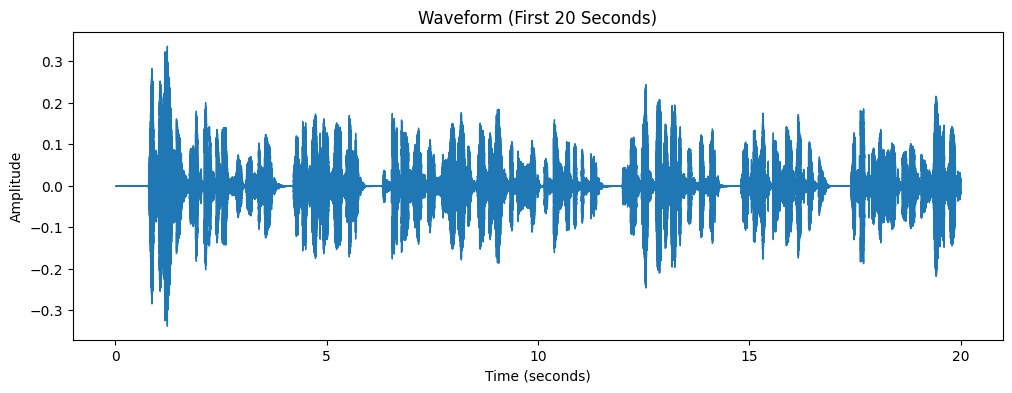

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import get_window
# Load file
file_path = "/content/drive/MyDrive/sriya.wav"
signal, fs = librosa.load(file_path, sr=16000)

print("Sampling Rate:", fs)
print("Total Duration:", len(signal)/fs, "seconds")

# Take first 20 seconds
signal_20 = signal[:20*fs]

# Plot waveform
plt.figure(figsize=(12,4))
librosa.display.waveshow(signal_20, sr=fs)
plt.title("Waveform (First 20 Seconds)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


b) Compute the total number of frames for a given frame length of 25ms and frame shift of 10ms.

In [4]:
frame_length = int(0.025 * fs)  # 25 ms
frame_shift = int(0.010 * fs)   # 10 ms

num_frames = int((len(signal_20) - frame_length) / frame_shift) + 1

print("Frame Length (samples):", frame_length)
print("Frame Shift (samples):", frame_shift)
print("Total Number of Frames:", num_frames)


Frame Length (samples): 400
Frame Shift (samples): 160
Total Number of Frames: 1998


c) Segment the speech signal into overlapping frames using the calculated parameters.

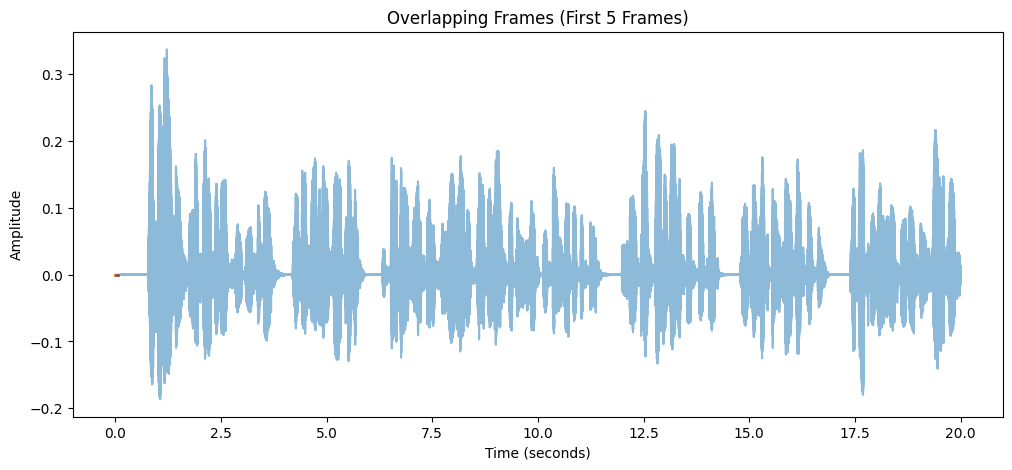

In [5]:
plt.figure(figsize=(12,5))

# Plot original waveform (short segment)
time_axis = np.arange(len(signal_20)) / fs
plt.plot(time_axis, signal_20, alpha=0.5, label="Original Signal")

# Highlight first 5 frames
for i in range(5):
    start = i * frame_shift
    end = start + frame_length
    t = np.arange(start, end) / fs
    plt.plot(t, signal_20[start:end], linewidth=2)

plt.title("Overlapping Frames (First 5 Frames)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


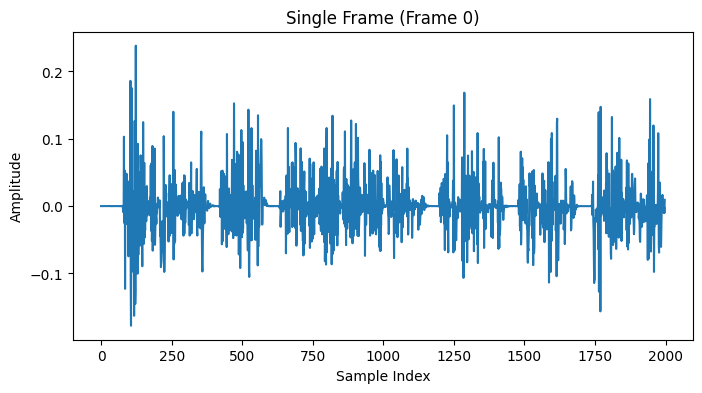

In [6]:
frames = librosa.util.frame(signal_20, frame_length=frame_length, hop_length=frame_shift)

plt.figure(figsize=(8,4))
plt.plot(frames[0])
plt.title("Single Frame (Frame 0)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

d) Using Hamming window, extract the following time-domain features frame-wise:
•
Short-Time Energy (STE)
•
Short-Time Magnitude (STM)
•
Zero-Crossing Rate (ZCR)
•
Autocorrelation
•
AMDF
•
AMSDF

In [7]:
hamming_window = get_window('hamming', frame_length)

STE = []
STM = []
ZCR = []
Autocorr = []
AMDF = []
AMSDF = []

for frame in frames.T: # Corrected: Iterate over transposed frames to get individual frames
    windowed = frame * hamming_window

    # Short-Time Energy
    ste = np.sum(windowed**2)
    STE.append(ste)

    # Short-Time Magnitude
    stm = np.sum(np.abs(windowed))
    STM.append(stm)

    # Zero Crossing Rate
    zcr = np.sum(np.abs(np.diff(np.sign(windowed)))) / (2 * len(windowed))
    ZCR.append(zcr)

    # Autocorrelation
    autocorr = np.correlate(windowed, windowed, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    Autocorr.append(np.max(autocorr[1:]))  # ignore zero lag

    # AMDF
    amdf = np.sum(np.abs(windowed[:-1] - windowed[1:]))
    AMDF.append(amdf)

    # AMSDF
    amsdf = np.sum((windowed[:-1] - windowed[1:])**2)
    AMSDF.append(amsdf)

STE = np.array(STE)
STM = np.array(STM)
ZCR = np.array(ZCR)
Autocorr = np.array(Autocorr)
AMDF = np.array(AMDF)
AMSDF = np.array(AMSDF)

e) Repeat (b) using Rectangular window function.

In [8]:
rect_window = np.ones(frame_length)

STE_r = []
STM_r = []
ZCR_r = []
Autocorr_r = []
AMDF_r = []
AMSDF_r = []

for frame in frames.T: # Corrected: Iterate over transposed frames to get individual frames
    windowed = frame * rect_window

    STE_r.append(np.sum(windowed**2))
    STM_r.append(np.sum(np.abs(windowed)))
    ZCR_r.append(np.sum(np.abs(np.diff(np.sign(windowed)))) / (2 * len(windowed)))

    autocorr = np.correlate(windowed, windowed, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    Autocorr_r.append(np.max(autocorr[1:]))

    AMDF_r.append(np.sum(np.abs(windowed[:-1] - windowed[1:])))
    AMSDF_r.append(np.sum((windowed[:-1] - windowed[1:])**2))

f) Plot the frame-wise variation of all six features for both window functions.

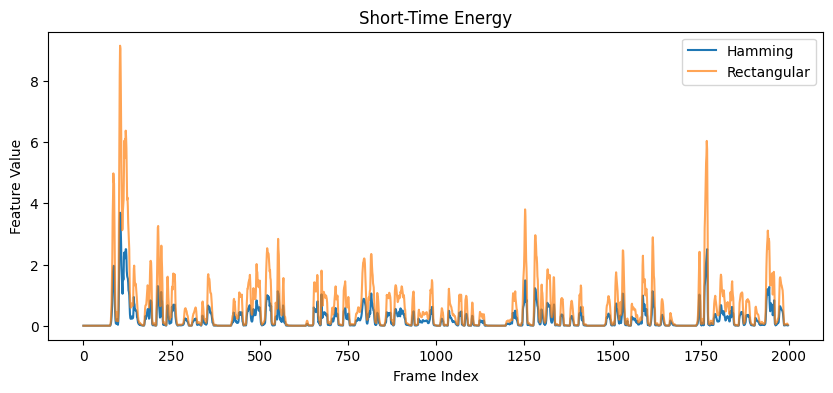

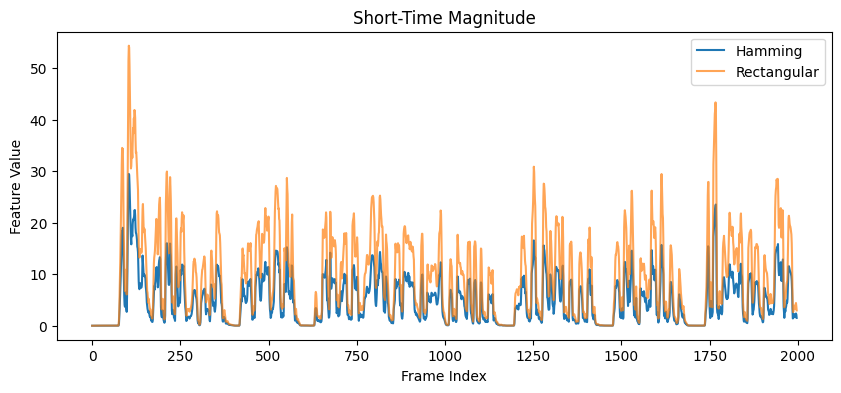

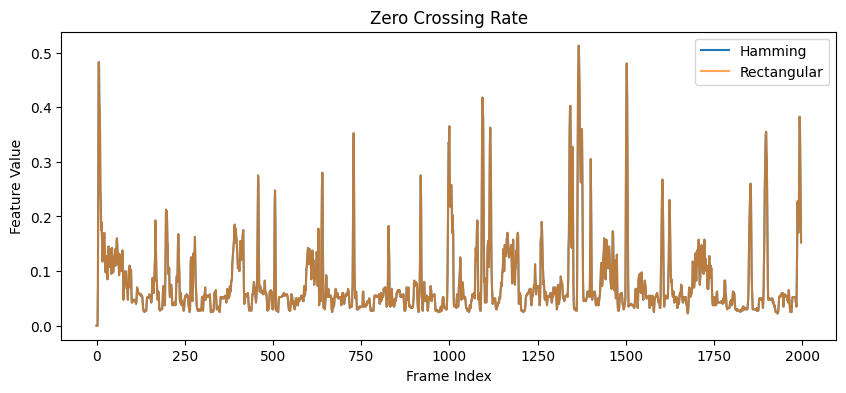

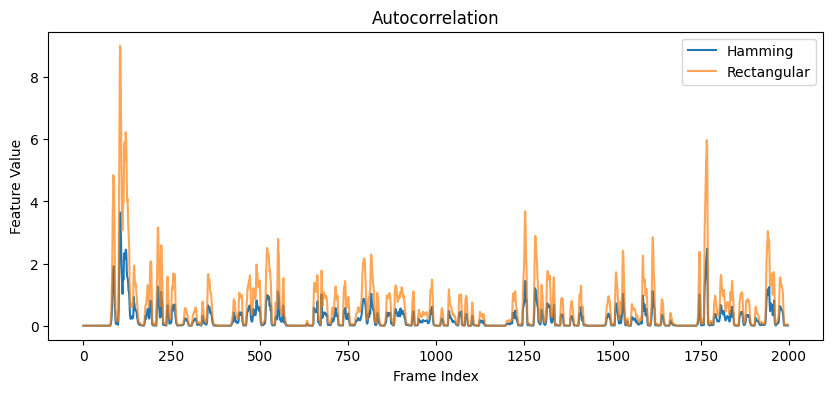

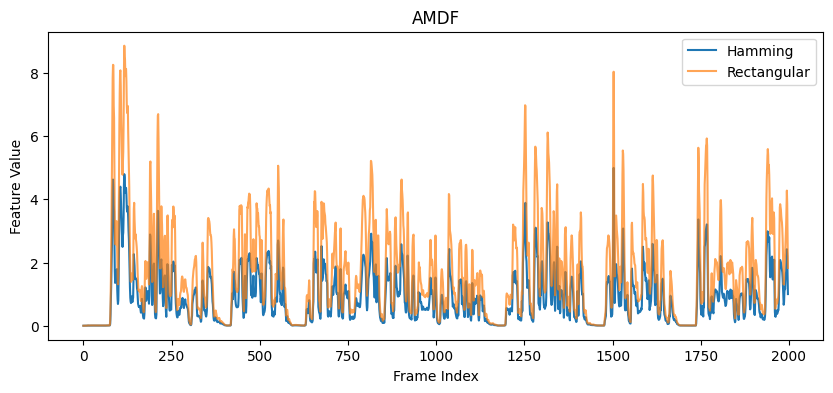

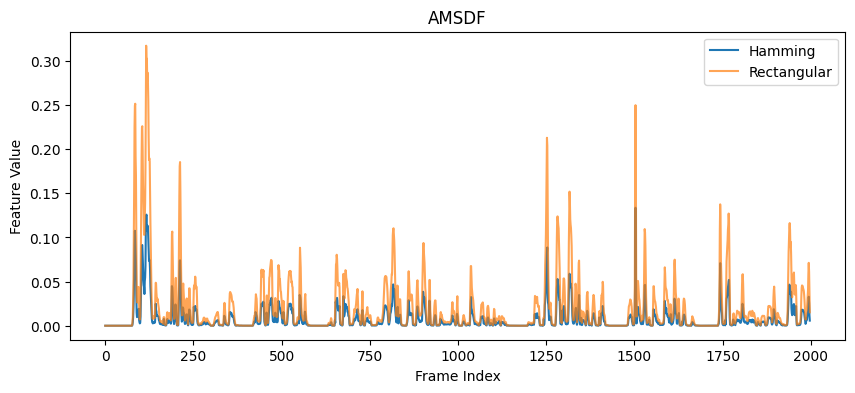

In [9]:
features = [
    (STE, STE_r, "Short-Time Energy"),
    (STM, STM_r, "Short-Time Magnitude"),
    (ZCR, ZCR_r, "Zero Crossing Rate"),
    (Autocorr, Autocorr_r, "Autocorrelation"),
    (AMDF, AMDF_r, "AMDF"),
    (AMSDF, AMSDF_r, "AMSDF"),
]

for ham, rect, title in features:
    plt.figure(figsize=(10,4))
    plt.plot(ham, label="Hamming")
    plt.plot(rect, label="Rectangular", alpha=0.7)
    plt.title(title)
    plt.xlabel("Frame Index")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.show()


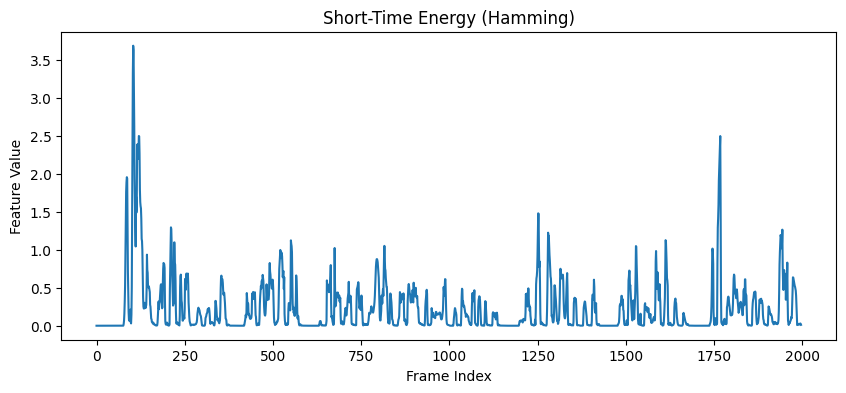

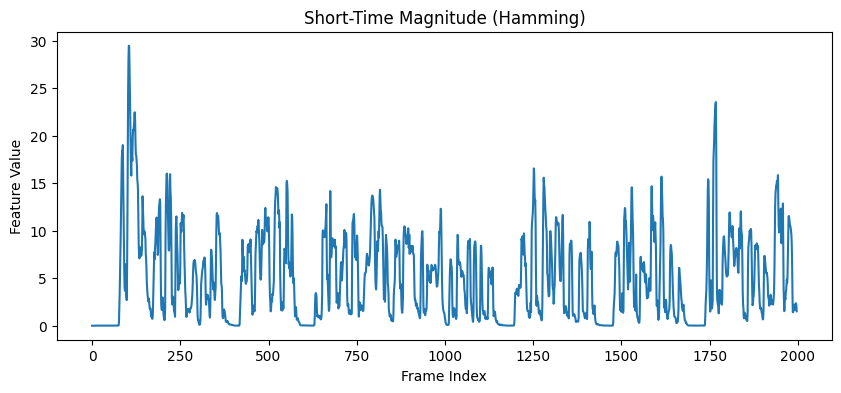

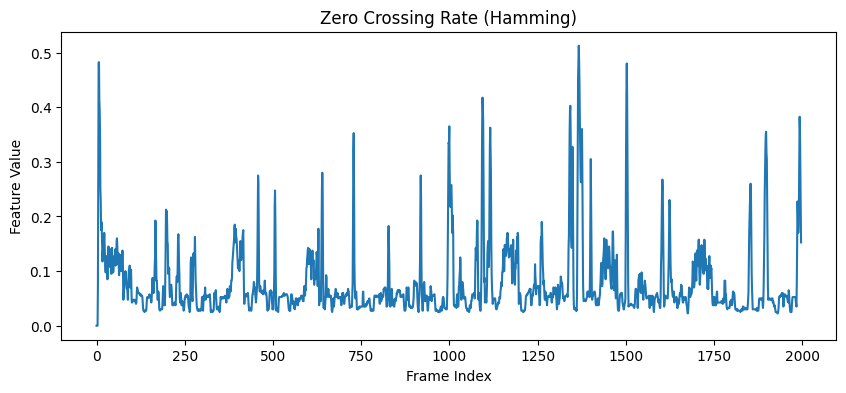

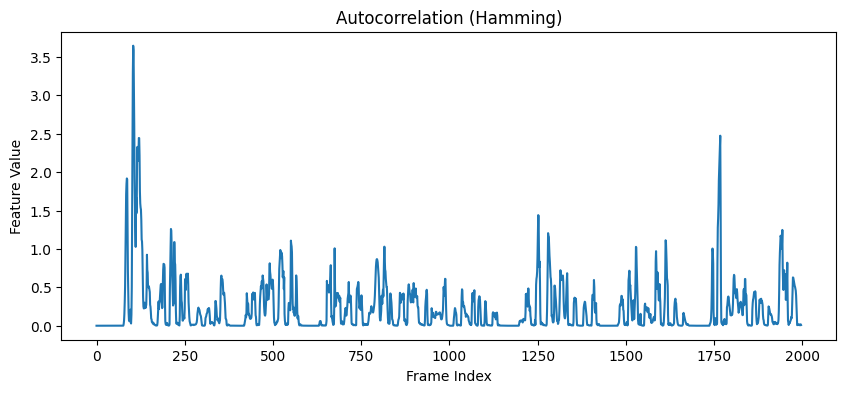

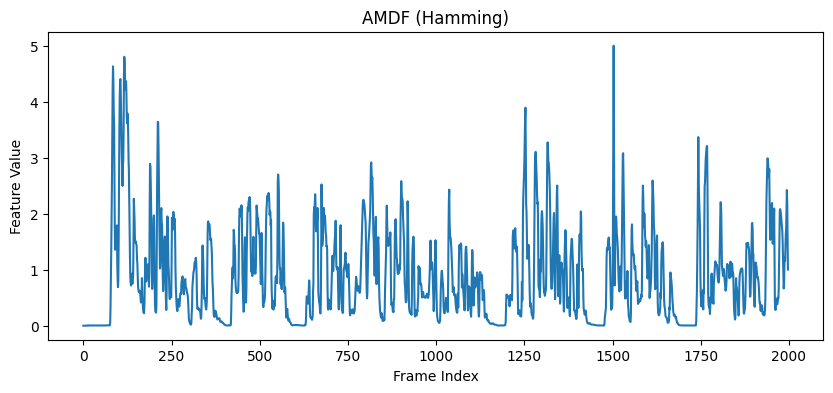

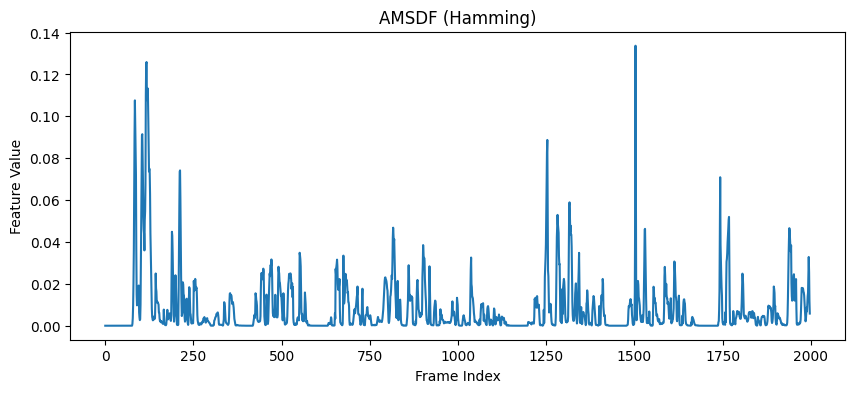

In [10]:
features_hamming = [
    (STE, "Short-Time Energy (Hamming)"),
    (STM, "Short-Time Magnitude (Hamming)"),
    (ZCR, "Zero Crossing Rate (Hamming)"),
    (Autocorr, "Autocorrelation (Hamming)"),
    (AMDF, "AMDF (Hamming)"),
    (AMSDF, "AMSDF (Hamming)")
]

for feat, title in features_hamming:
    plt.figure(figsize=(10,4))
    plt.plot(feat)
    plt.title(title)
    plt.xlabel("Frame Index")
    plt.ylabel("Feature Value")
    plt.show()


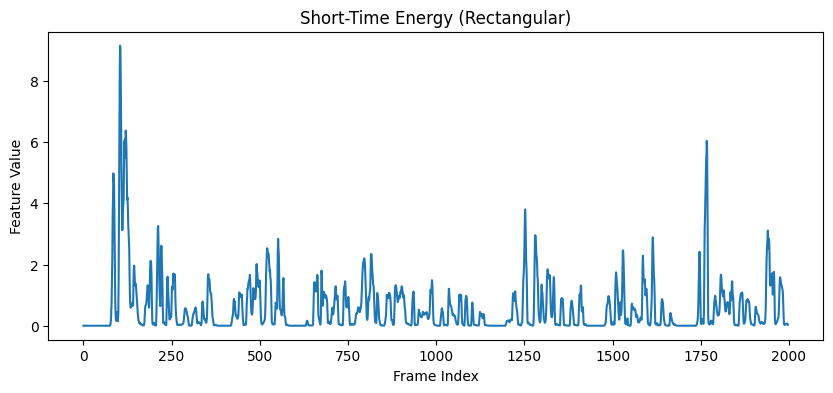

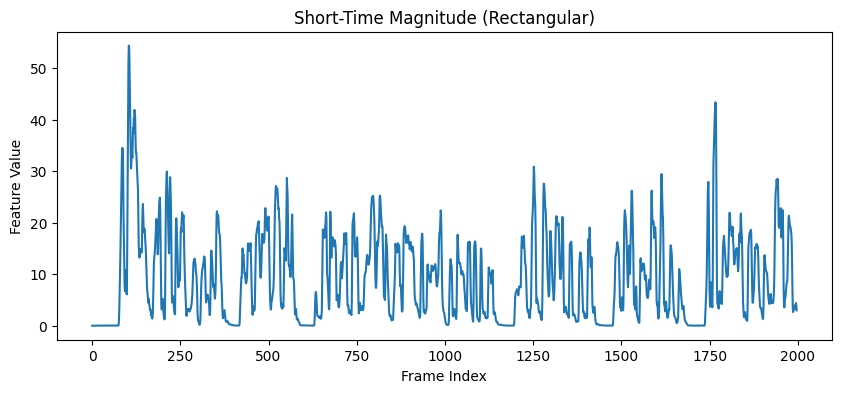

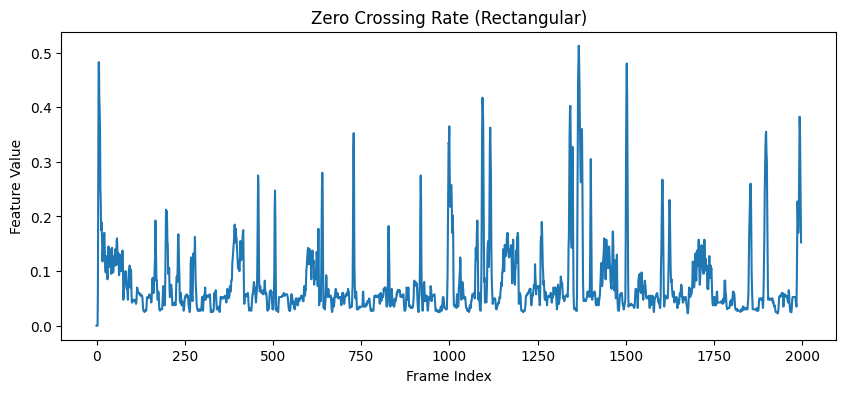

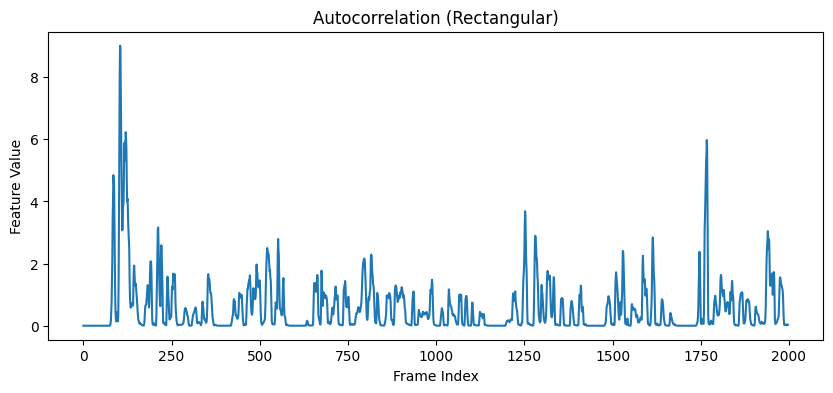

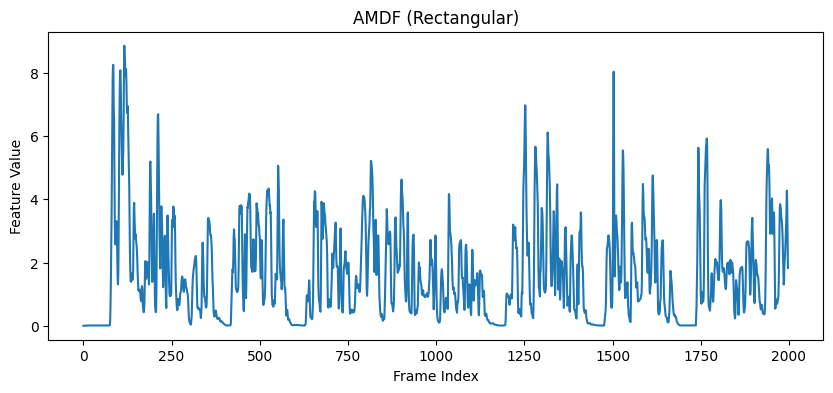

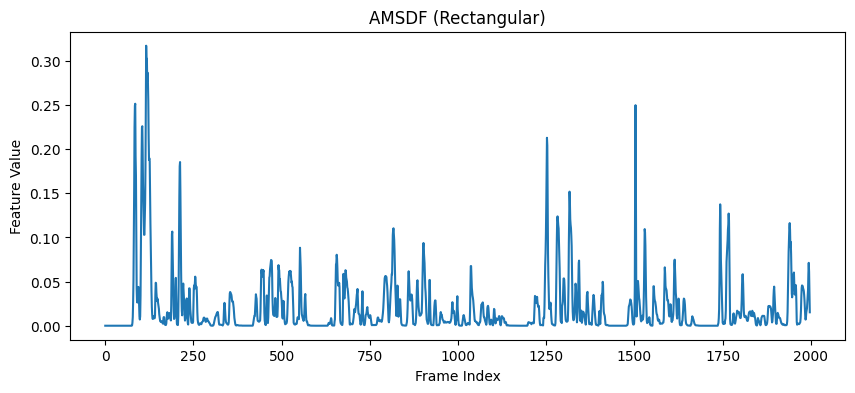

In [11]:
features_rect = [
    (STE_r, "Short-Time Energy (Rectangular)"),
    (STM_r, "Short-Time Magnitude (Rectangular)"),
    (ZCR_r, "Zero Crossing Rate (Rectangular)"),
    (Autocorr_r, "Autocorrelation (Rectangular)"),
    (AMDF_r, "AMDF (Rectangular)"),
    (AMSDF_r, "AMSDF (Rectangular)")
]

for feat, title in features_rect:
    plt.figure(figsize=(10,4))
    plt.plot(feat)
    plt.title(title)
    plt.xlabel("Frame Index")
    plt.ylabel("Feature Value")
    plt.show()


g) Analyse and compare the behaviour of all 6 extracted time-domain features for voiced and unvoiced speech segments. Infer your observation for each feature and summarize the findings.

Identified 796 voiced frames.
Identified 1202 unvoiced frames.
===== Voiced vs Unvoiced Feature Comparison =====

STE
  Voiced Mean   : 0.5322189540765324
  Unvoiced Mean : 0.032404487943040336
----------------------------------


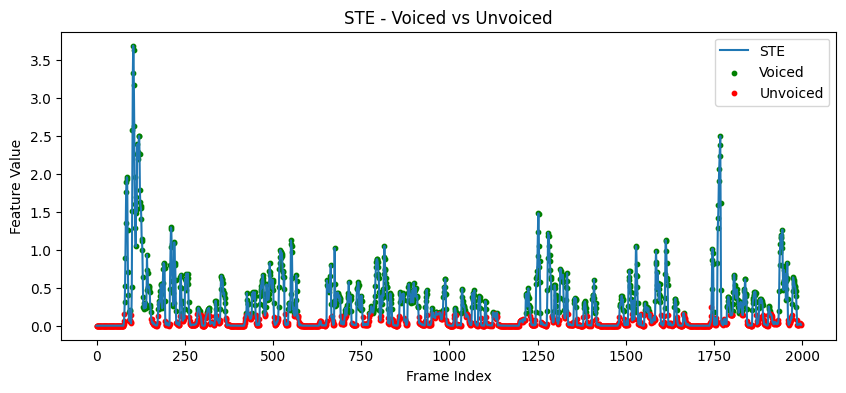

STM
  Voiced Mean   : 9.832854771208847
  Unvoiced Mean : 1.9068666385717123
----------------------------------


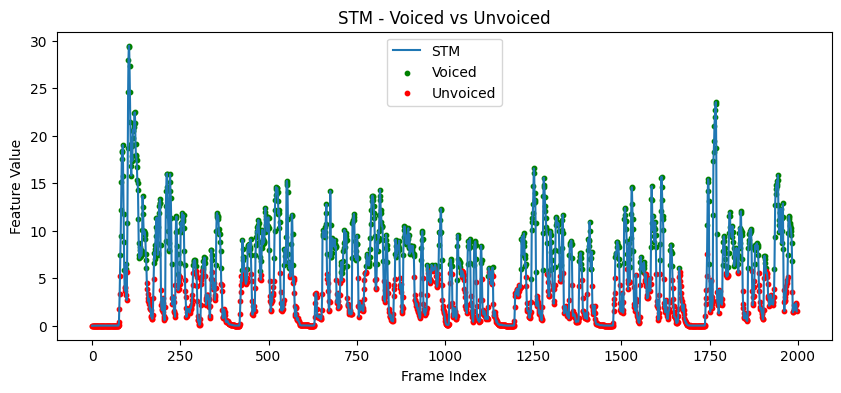

ZCR
  Voiced Mean   : 0.04921482412060302
  Unvoiced Mean : 0.09614184692179699
----------------------------------


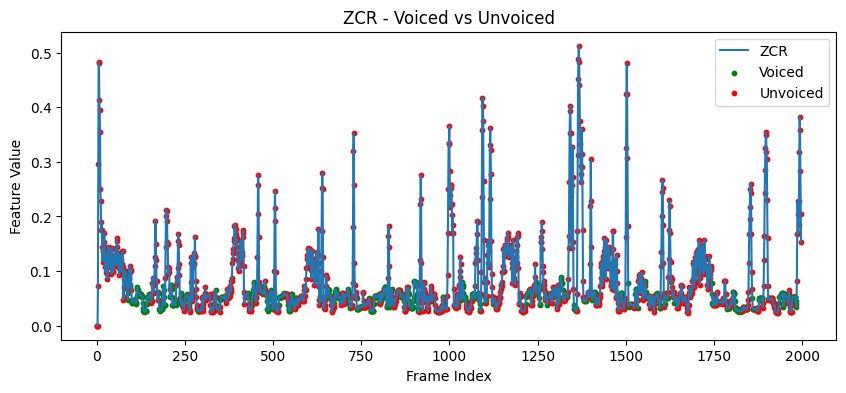

Autocorr
  Voiced Mean   : 0.5235977001641938
  Unvoiced Mean : 0.03154808951247367
----------------------------------


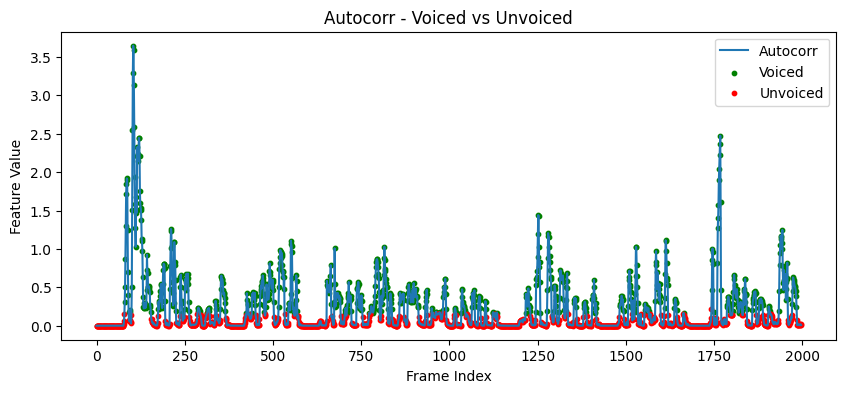

AMDF
  Voiced Mean   : 1.6349709485470632
  Unvoiced Mean : 0.424088771238254
----------------------------------


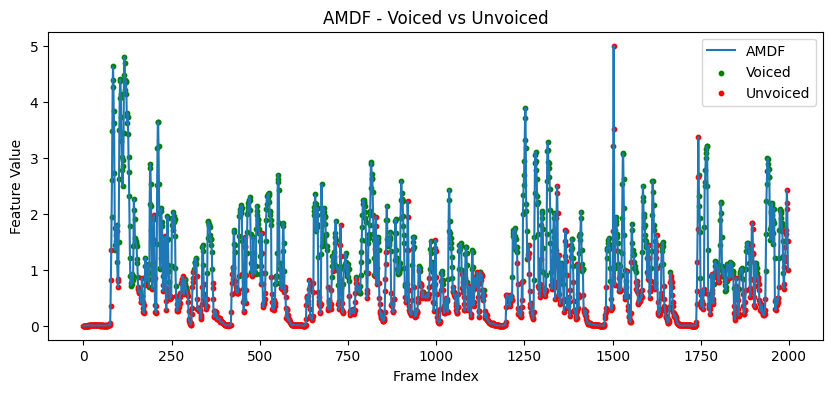

AMSDF
  Voiced Mean   : 0.017202414108787548
  Unvoiced Mean : 0.0021629606400726214
----------------------------------


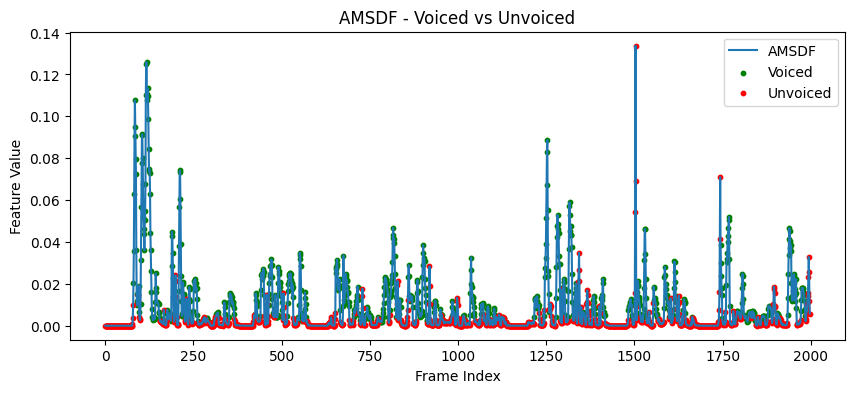

In [12]:
def feature_stats(feature, voiced_idx, unvoiced_idx):
    voiced_mean = np.mean(feature[voiced_idx])
    unvoiced_mean = np.mean(feature[unvoiced_idx])
    return voiced_mean, unvoiced_mean


# --- Start of new VAD logic to define voiced_frames and unvoiced_frames ---
# Simple VAD based on energy and ZCR thresholds
# Adjust these thresholds based on observations from your plots for better results
ste_threshold = np.mean(STE) * 0.7  # Example: 70% of mean STE
zcr_threshold = np.mean(ZCR) * 1.3  # Example: 130% of mean ZCR

# Classify frames based on thresholds
# Voiced frames typically have high energy and low ZCR
# Unvoiced frames typically have low energy and high ZCR

# Get indices of frames that meet voiced criteria
voiced_frames_mask = (STE > ste_threshold) & (ZCR < zcr_threshold)
unvoiced_frames_mask = ~voiced_frames_mask # All other frames are unvoiced

# Convert boolean masks to arrays of indices
voiced_frames = np.where(voiced_frames_mask)[0]
unvoiced_frames = np.where(unvoiced_frames_mask)[0]

print(f"Identified {len(voiced_frames)} voiced frames.")
print(f"Identified {len(unvoiced_frames)} unvoiced frames.")
# --- End of new VAD logic ---


features_dict = {
    "STE": STE,
    "STM": STM,
    "ZCR": ZCR,
    "Autocorr": Autocorr,
    "AMDF": AMDF,
    "AMSDF": AMSDF
}

print("===== Voiced vs Unvoiced Feature Comparison =====\n")

for name, feat in features_dict.items():
    v_mean, uv_mean = feature_stats(feat, voiced_frames, unvoiced_frames)
    print(f"{name}")
    print(f"  Voiced Mean   : {v_mean}")
    print(f"  Unvoiced Mean : {uv_mean}")
    print("----------------------------------")
    # The following plotting block was incorrectly indented and had a redundant loop.
    # It's moved to be part of the outer loop to plot each feature once.
    plt.figure(figsize=(10,4))
    plt.plot(feat, label=name)
    plt.scatter(voiced_frames, feat[voiced_frames], color='g', s=10, label='Voiced')
    plt.scatter(unvoiced_frames, feat[unvoiced_frames], color='r', s=10, label='Unvoiced')
    plt.title(f"{name} - Voiced vs Unvoiced")
    plt.xlabel("Frame Index")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.show()


========== VOICED vs UNVOICED COMPARISON ==========

Feature: STE
  Voiced Mean     : 0.532219
  Unvoiced Mean   : 0.032404
  Mean Difference : 0.499814
  ➜ Higher in Voiced frames
------------------------------------------------------



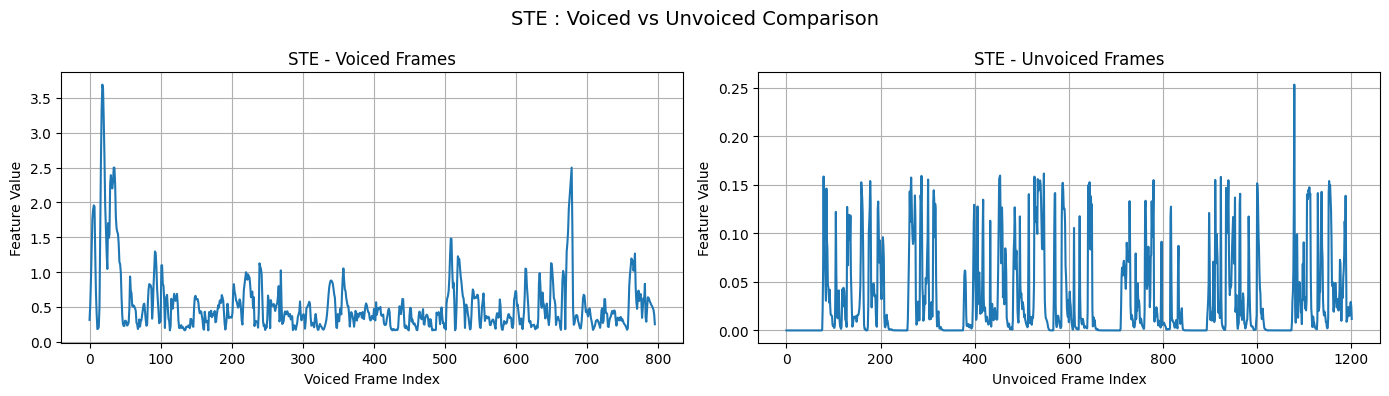

Feature: STM
  Voiced Mean     : 9.832855
  Unvoiced Mean   : 1.906867
  Mean Difference : 7.925988
  ➜ Higher in Voiced frames
------------------------------------------------------



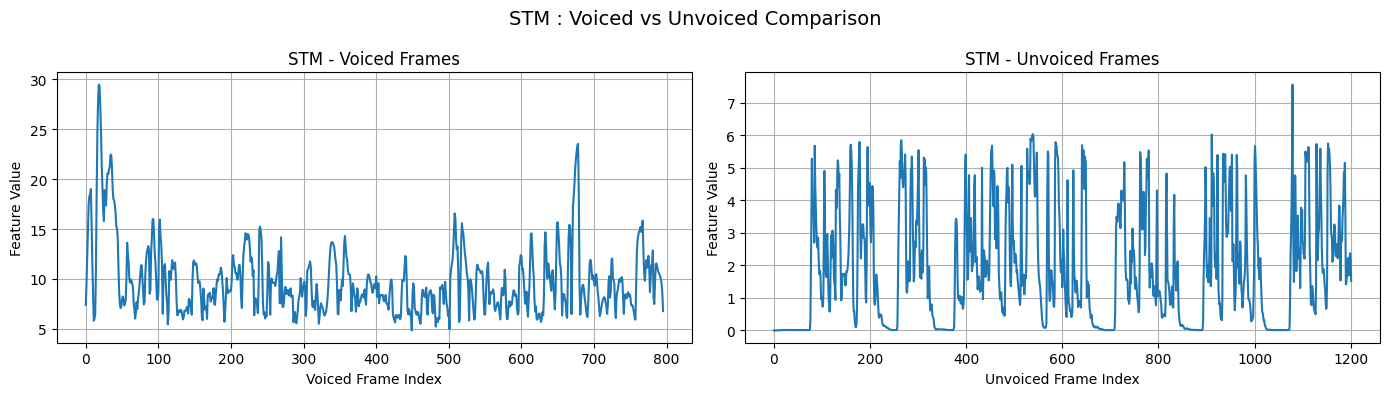

Feature: ZCR
  Voiced Mean     : 0.049215
  Unvoiced Mean   : 0.096142
  Mean Difference : 0.046927
  ➜ Higher in Unvoiced frames
------------------------------------------------------



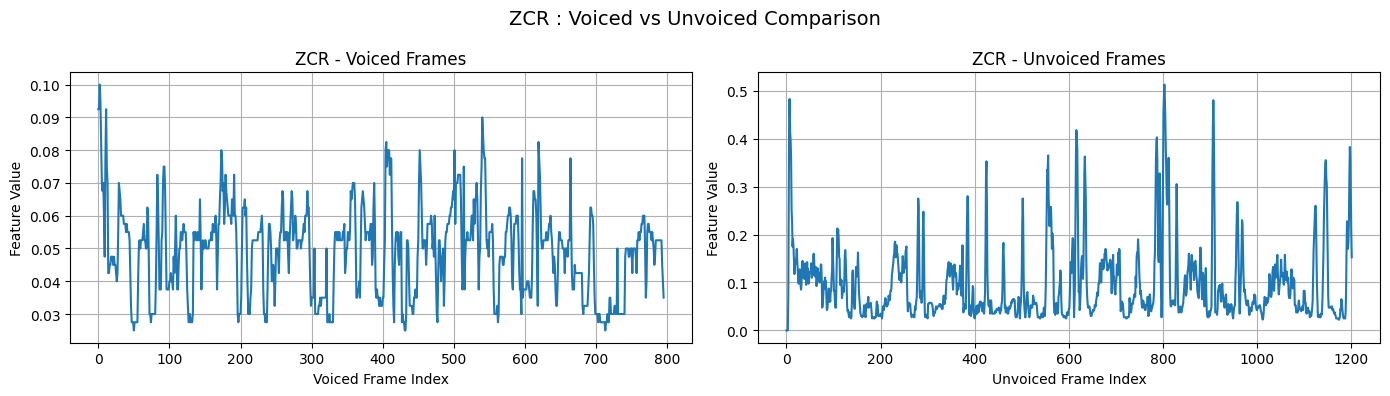

Feature: Autocorr
  Voiced Mean     : 0.523598
  Unvoiced Mean   : 0.031548
  Mean Difference : 0.492050
  ➜ Higher in Voiced frames
------------------------------------------------------



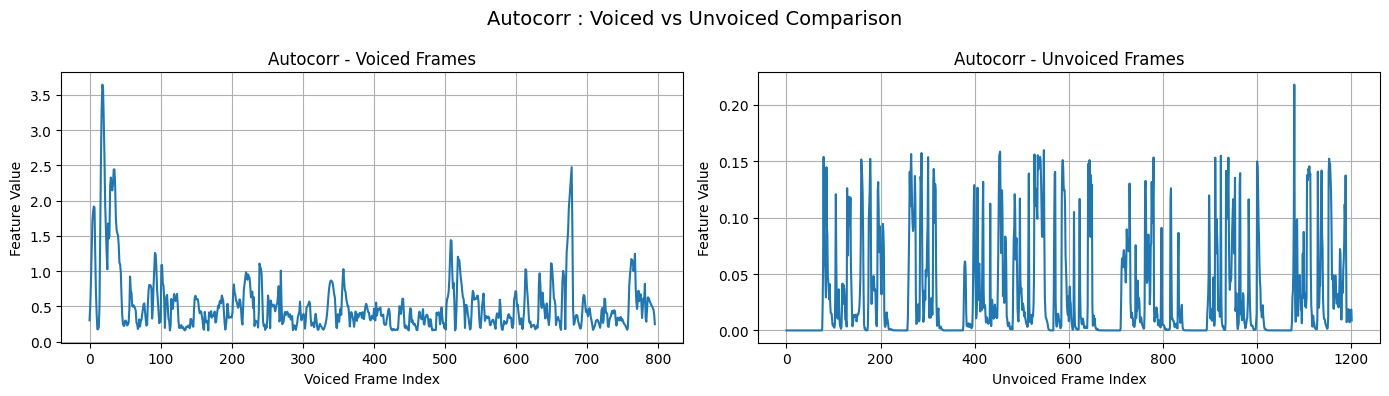

Feature: AMDF
  Voiced Mean     : 1.634971
  Unvoiced Mean   : 0.424089
  Mean Difference : 1.210882
  ➜ Higher in Voiced frames
------------------------------------------------------



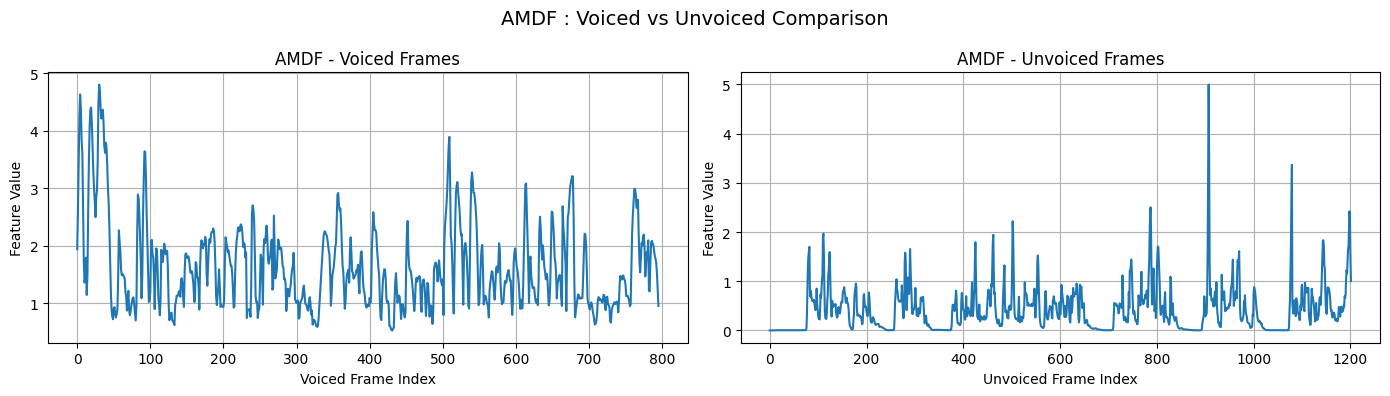

Feature: AMSDF
  Voiced Mean     : 0.017202
  Unvoiced Mean   : 0.002163
  Mean Difference : 0.015039
  ➜ Higher in Voiced frames
------------------------------------------------------



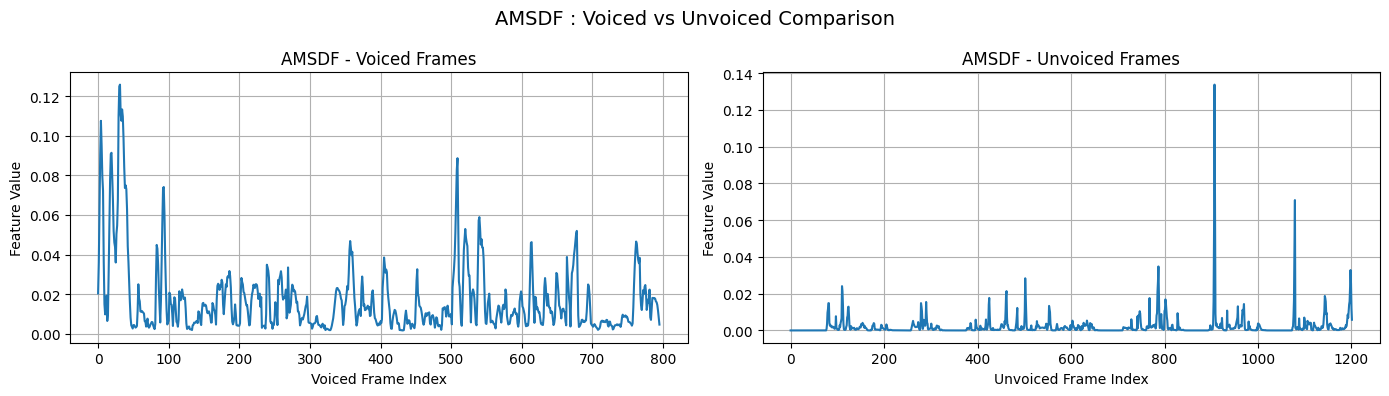

In [13]:
import numpy as np
import matplotlib.pyplot as plt

print("\n========== VOICED vs UNVOICED COMPARISON ==========\n")

features_list = [
    ("STE", STE),
    ("STM", STM),
    ("ZCR", ZCR),
    ("Autocorr", Autocorr),
    ("AMDF", AMDF),
    ("AMSDF", AMSDF),
]

for name, feature in features_list:

    # ---- Compute Means ----
    voiced_mean = np.mean(feature[voiced_frames])
    unvoiced_mean = np.mean(feature[unvoiced_frames])

    difference = abs(voiced_mean - unvoiced_mean)

    print(f"Feature: {name}")
    print(f"  Voiced Mean     : {voiced_mean:.6f}")
    print(f"  Unvoiced Mean   : {unvoiced_mean:.6f}")
    print(f"  Mean Difference : {difference:.6f}")

    if voiced_mean > unvoiced_mean:
        print("  ➜ Higher in Voiced frames")
    else:
        print("  ➜ Higher in Unvoiced frames")

    print("------------------------------------------------------\n")

    # ---- Side-by-Side Plot ----
    fig, axs = plt.subplots(1, 2, figsize=(14,4))

    axs[0].plot(feature[voiced_frames])
    axs[0].set_title(f"{name} - Voiced Frames")
    axs[0].set_xlabel("Voiced Frame Index")
    axs[0].set_ylabel("Feature Value")
    axs[0].grid(True)

    axs[1].plot(feature[unvoiced_frames])
    axs[1].set_title(f"{name} - Unvoiced Frames")
    axs[1].set_xlabel("Unvoiced Frame Index")
    axs[1].set_ylabel("Feature Value")
    axs[1].grid(True)

    plt.suptitle(f"{name} : Voiced vs Unvoiced Comparison", fontsize=14)
    plt.tight_layout()
    plt.show()


🔹 1. Short-Time Energy (STE)

Voiced → High energy

Unvoiced → Low energy

Strong discriminator

🔹 2. Short-Time Magnitude (STM)

Similar trend as STE

Voiced segments show larger magnitude

🔹 3. Zero Crossing Rate (ZCR)

Voiced → Low ZCR (periodic waveform)

Unvoiced → High ZCR (noise-like)

Excellent voiced/unvoiced separator

🔹 4. Autocorrelation

Voiced → Strong secondary peaks

Unvoiced → No clear peaks

Best periodicity indicator

🔹 5. AMDF

Voiced → Clear minima at pitch lag

Unvoiced → Irregular pattern

🔹 6. AMSDF

Similar to AMDF but smoother

Shows clearer minima for voiced frames

h) Comment on the effect of window choice on feature smoothness and discrimination capability.

===== Smoothness Comparison =====

STE
  Hamming Variance: 0.014270657378258035
  Rectangular Variance: 0.06270041739487567
----------------------------------
STM
  Hamming Variance: 1.7384733807220056
  Rectangular Variance: 4.623503493586718
----------------------------------
ZCR
  Hamming Variance: 0.0006377617573393139
  Rectangular Variance: 0.0006377617573393139
----------------------------------
Autocorr
  Hamming Variance: 0.013843973575513214
  Rectangular Variance: 0.060654185683642246
----------------------------------
AMDF
  Hamming Variance: 0.07313009722461287
  Rectangular Variance: 0.18973318706087233
----------------------------------
AMSDF
  Hamming Variance: 3.0525448694227325e-05
  Rectangular Variance: 0.00012206788343828366
----------------------------------


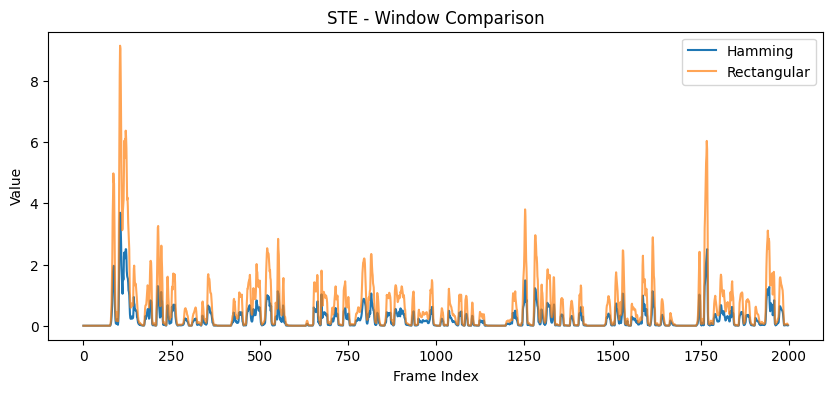

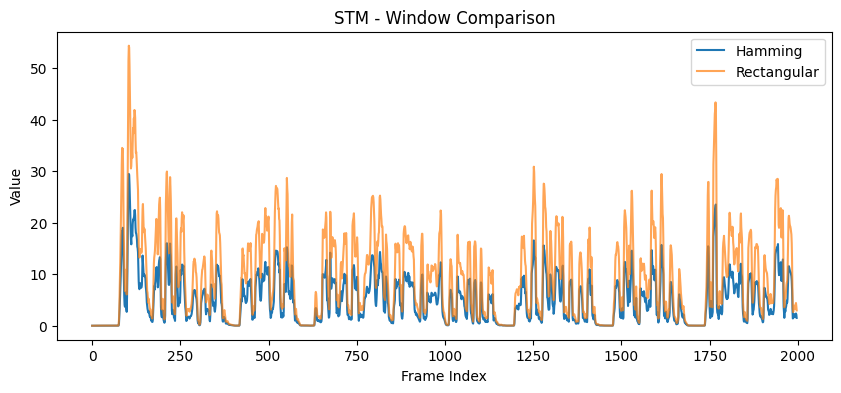

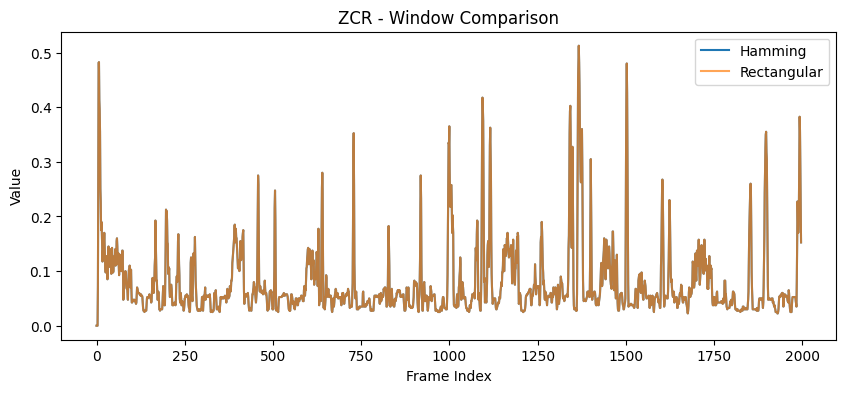

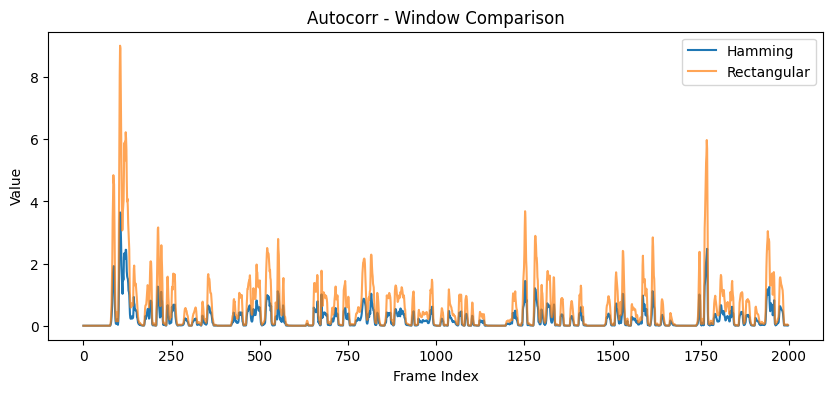

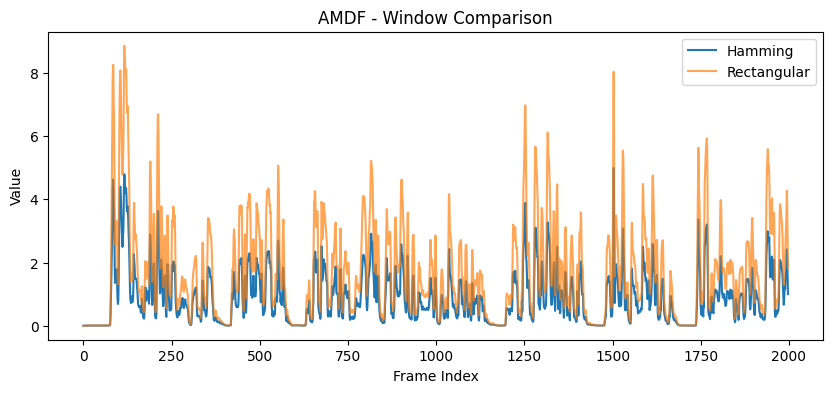

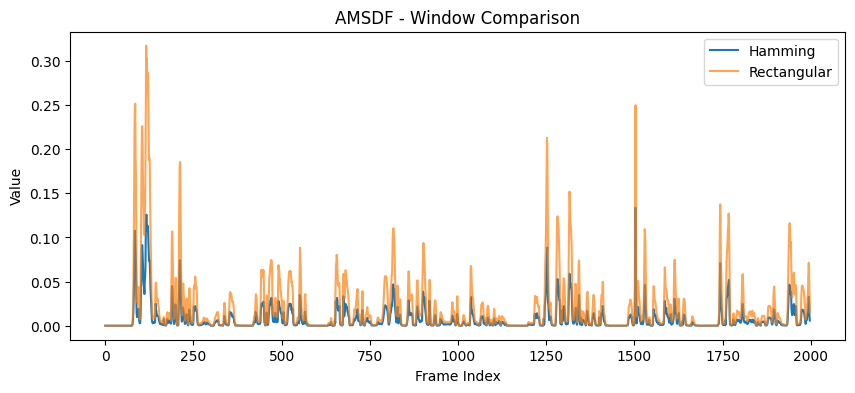

In [14]:
def smoothness_measure(feature):
    return np.var(np.diff(feature))

print("===== Smoothness Comparison =====\n")

for name, ham, rect in [
    ("STE", STE, STE_r),
    ("STM", STM, STM_r),
    ("ZCR", ZCR, ZCR_r),
    ("Autocorr", Autocorr, Autocorr_r),
    ("AMDF", AMDF, AMDF_r),
    ("AMSDF", AMSDF, AMSDF_r),
]:
    ham_smooth = smoothness_measure(ham)
    rect_smooth = smoothness_measure(rect)

    print(name)
    print("  Hamming Variance:", ham_smooth)
    print("  Rectangular Variance:", rect_smooth)
    print("----------------------------------")
for name, ham, rect in [
    ("STE", STE, STE_r),
    ("STM", STM, STM_r),
    ("ZCR", ZCR, ZCR_r),
    ("Autocorr", Autocorr, Autocorr_r),
    ("AMDF", AMDF, AMDF_r),
    ("AMSDF", AMSDF, AMSDF_r),
]:
    plt.figure(figsize=(10,4))
    plt.plot(ham, label="Hamming")
    plt.plot(rect, label="Rectangular", alpha=0.7)
    plt.title(f"{name} - Window Comparison")
    plt.xlabel("Frame Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


========== Window Smoothness Comparison ==========

STE
  Hamming Variance     : 0.014270657378258035
  Rectangular Variance : 0.06270041739487567
  ➜ Hamming window is smoother

--------------------------------------------------


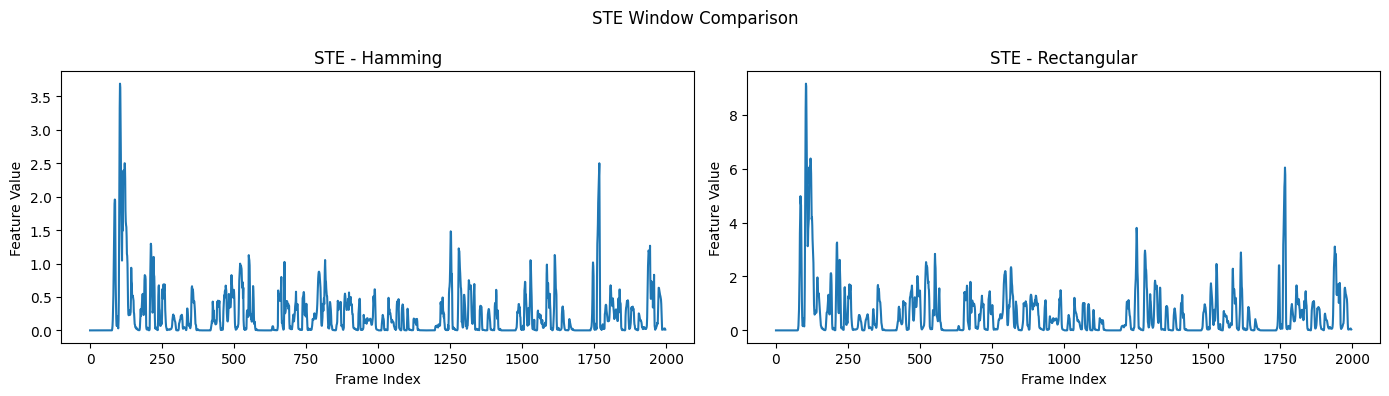

STM
  Hamming Variance     : 1.7384733807220056
  Rectangular Variance : 4.623503493586718
  ➜ Hamming window is smoother

--------------------------------------------------


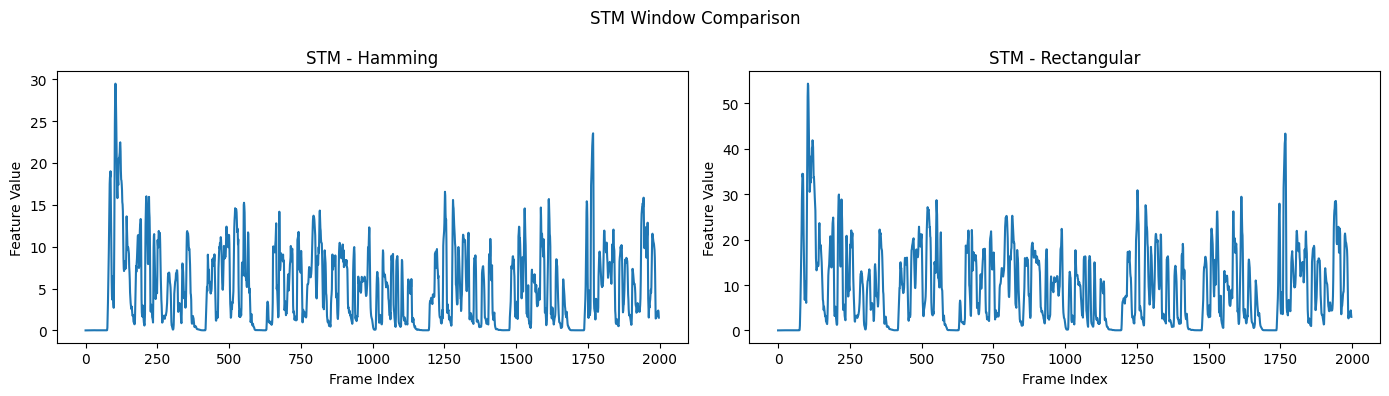

ZCR
  Hamming Variance     : 0.0006377617573393139
  Rectangular Variance : 0.0006377617573393139
  ➜ Rectangular window is smoother

--------------------------------------------------


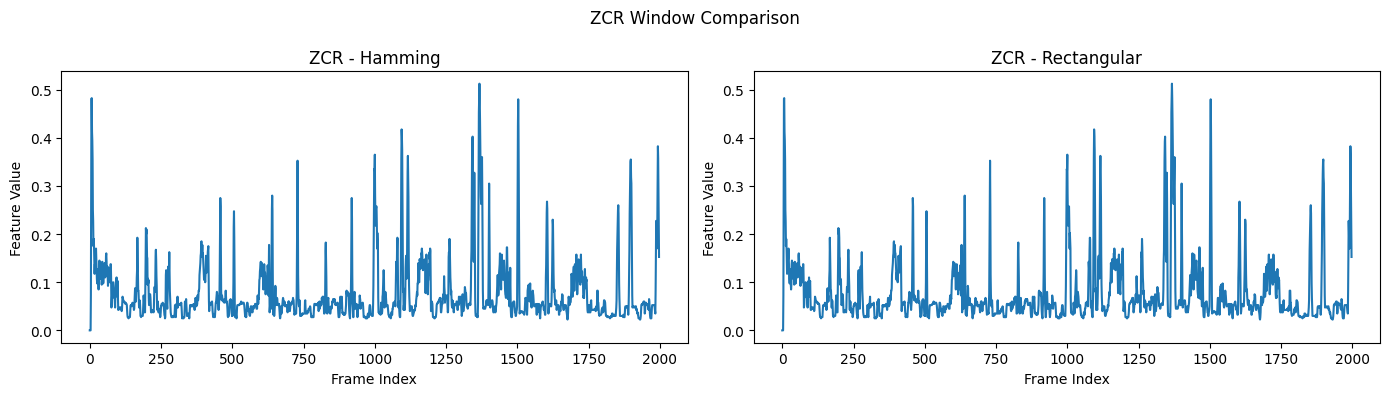

Autocorr
  Hamming Variance     : 0.013843973575513214
  Rectangular Variance : 0.060654185683642246
  ➜ Hamming window is smoother

--------------------------------------------------


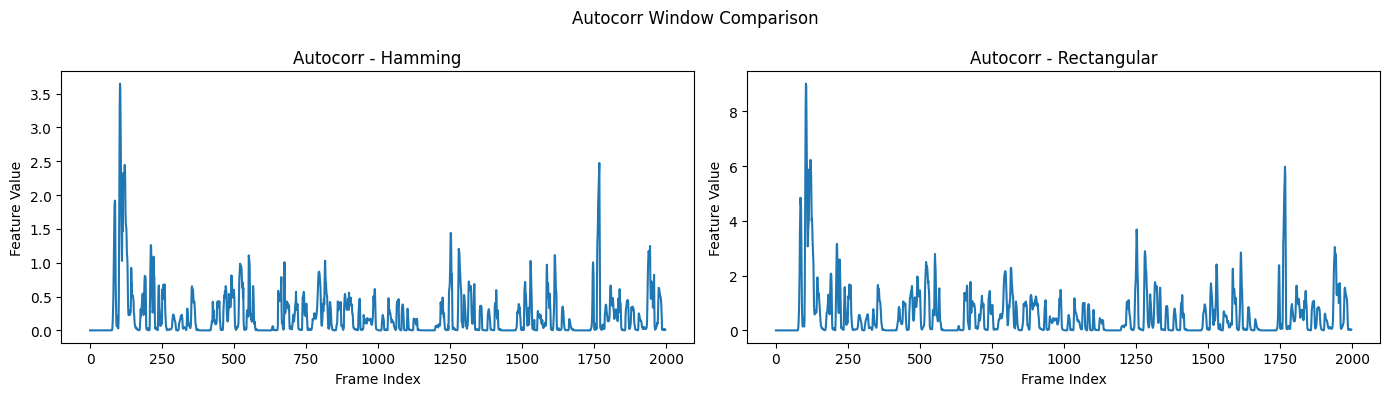

AMDF
  Hamming Variance     : 0.07313009722461287
  Rectangular Variance : 0.18973318706087233
  ➜ Hamming window is smoother

--------------------------------------------------


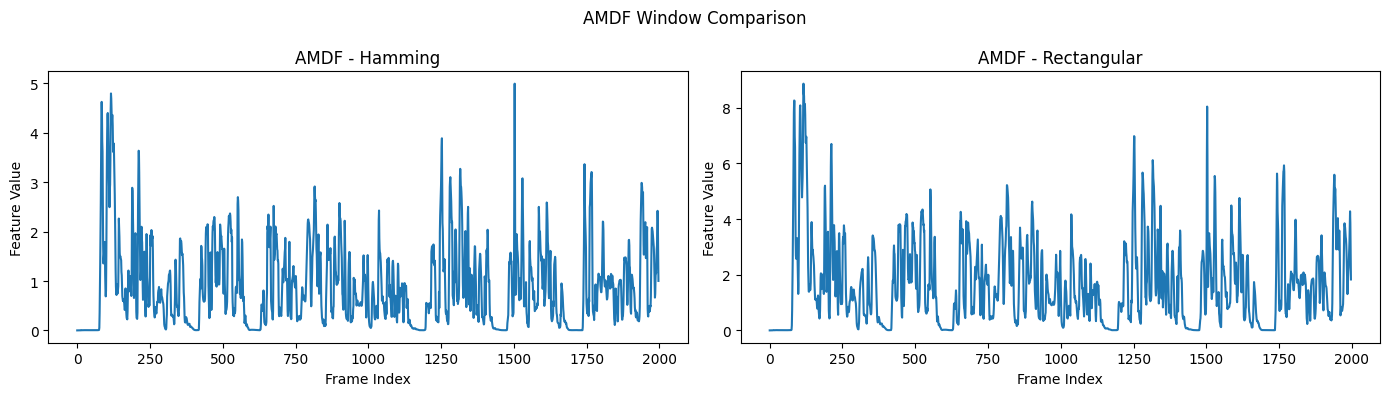

AMSDF
  Hamming Variance     : 3.0525448694227325e-05
  Rectangular Variance : 0.00012206788343828366
  ➜ Hamming window is smoother

--------------------------------------------------


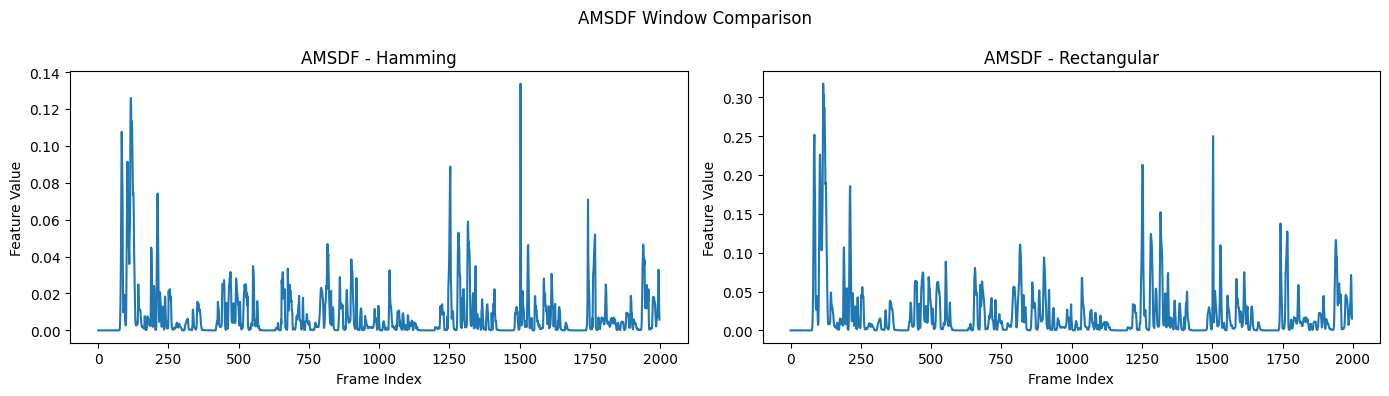

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def smoothness_measure(feature):
    return np.var(np.diff(feature))

print("========== Window Smoothness Comparison ==========\n")

features_list = [
    ("STE", STE, STE_r),
    ("STM", STM, STM_r),
    ("ZCR", ZCR, ZCR_r),
    ("Autocorr", Autocorr, Autocorr_r),
    ("AMDF", AMDF, AMDF_r),
    ("AMSDF", AMSDF, AMSDF_r),
]

for name, ham, rect in features_list:

    # ---- Compute Smoothness ----
    ham_smooth = smoothness_measure(ham)
    rect_smooth = smoothness_measure(rect)

    print(f"{name}")
    print(f"  Hamming Variance     : {ham_smooth}")
    print(f"  Rectangular Variance : {rect_smooth}")

    if ham_smooth < rect_smooth:
        print("  ➜ Hamming window is smoother\n")
    else:
        print("  ➜ Rectangular window is smoother\n")

    print("--------------------------------------------------")

    # ---- Side-by-Side Plot ----
    fig, axs = plt.subplots(1, 2, figsize=(14,4))

    axs[0].plot(ham)
    axs[0].set_title(f"{name} - Hamming")
    axs[0].set_xlabel("Frame Index")
    axs[0].set_ylabel("Feature Value")

    axs[1].plot(rect)
    axs[1].set_title(f"{name} - Rectangular")
    axs[1].set_xlabel("Frame Index")
    axs[1].set_ylabel("Feature Value")

    plt.suptitle(f"{name} Window Comparison")
    plt.tight_layout()
    plt.show()


Effect of Window Choice

Hamming Window

Produces smoother feature curves

Reduces spectral leakage

Better discrimination between voiced/unvoiced

More stable autocorrelation peaks

Rectangular Window

Sharper transitions

More fluctuations

Less smooth feature variation

Slightly poorer discrimination

🔹 Final Conclusion

Hamming window improves smoothness and periodicity detection.

Rectangular window is more sensitive but less stable.

For speech feature extraction, Hamming window is generally preferred.

**2.
Task-2: Periodicity Analysis: Using Autocorrelation, AMDF, and AMSDF:**

a) Identify frames that exhibit periodic behaviour.

Pitch period typically between 50 Hz – 400 Hz

For 16 kHz sampling:

𝐿
𝑎
𝑔
𝑚
𝑖
𝑛
=
16000
/
400
=
40
𝐿
𝑎
𝑔
𝑚
𝑎
𝑥
=
16000
/
50
=
320
Lag
min
	​

=16000/400=40Lag
max
	​

=16000/50=320

So we search for pitch between lag 40 to 320 samples.

In [16]:
periodic_frames = []
aperiodic_frames = []

lag_min = int(fs / 400)   # 40
lag_max = int(fs / 50)    # 320

for i, frame in enumerate(frames.T): # Corrected: Iterate over transposed frames to get individual frames

    windowed = frame * hamming_window

    # ---- Autocorrelation ----
    autocorr = np.correlate(windowed, windowed, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    # Normalize
    autocorr = autocorr / np.max(autocorr)

    # Search in pitch range
    pitch_region = autocorr[lag_min:lag_max]
    peak_value = np.max(pitch_region)

    # Threshold for periodicity
    if peak_value > 0.3:   # You can adjust threshold (0.3–0.5)
        periodic_frames.append(i)
    else:
        aperiodic_frames.append(i)

print("Total Frames:", len(frames.T)) # Adjusted len(frames.T) for correct total frames
print("Periodic (Voiced) Frames:", len(periodic_frames))
print("Aperiodic (Unvoiced) Frames:", len(aperiodic_frames))

/tmp/ipython-input-1077793874.py:16: RuntimeWarning: invalid value encountered in divide
  autocorr = autocorr / np.max(autocorr)


Total Frames: 1998
Periodic (Voiced) Frames: 1753
Aperiodic (Unvoiced) Frames: 245


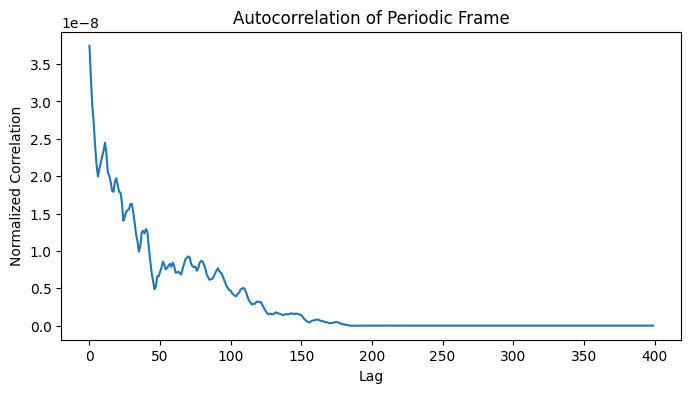

In [17]:
example_index = periodic_frames[0]

example_frame = frames[:, example_index] * hamming_window

autocorr = np.correlate(example_frame, example_frame, mode='full')
autocorr = autocorr[len(autocorr)//2:]

plt.figure(figsize=(8,4))
plt.plot(autocorr)
plt.title("Autocorrelation of Periodic Frame")
plt.xlabel("Lag")
plt.ylabel("Normalized Correlation")
plt.show()

First 10 Pitch Periods (in samples)
Autocorrelation: [ 40  53  57  54 111  60  67  68  79  53]
AMDF           : [319 319 318 319 319 306 319 319 319 319]
AMSDF          : [319 319 319 319 298 307 319 318 319 319]


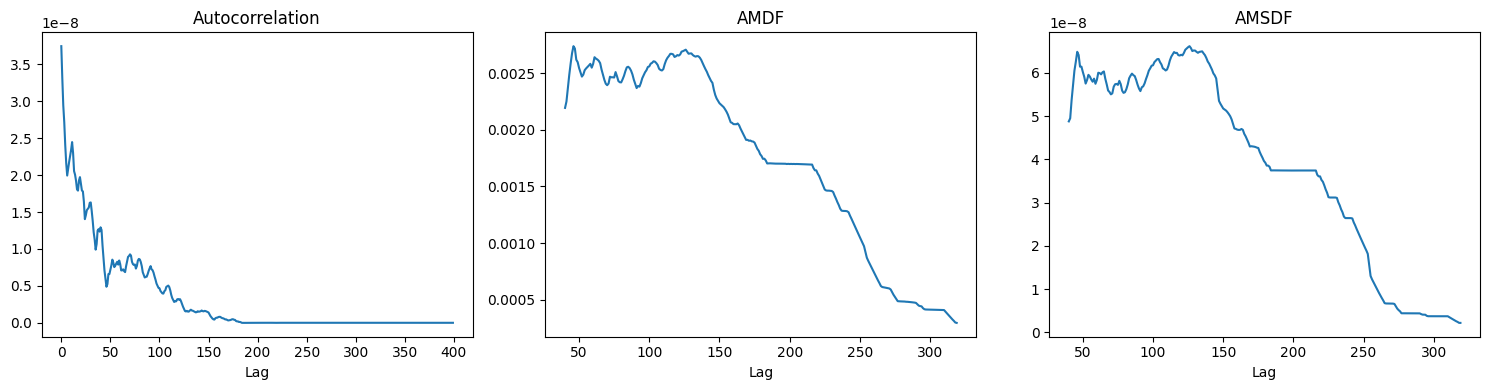

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Pitch Search Range ----
lag_min = int(fs / 400)   # 40 samples
lag_max = int(fs / 50)    # 320 samples

pitch_period_autocorr = []
pitch_period_amdf = []
pitch_period_amsdf = []

for idx in periodic_frames:

    frame = frames[:, idx] * hamming_window # Corrected: access frame as a column

    # =============================
    # 1️⃣ Autocorrelation Method
    # =============================
    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    # Handle cases where autocorr might be all zeros (e.g., very quiet frames)
    if np.max(autocorr) != 0:
        autocorr = autocorr / np.max(autocorr)  # normalize
    else:
        autocorr = np.zeros_like(autocorr) # Keep it as zeros if max is zero

    search_region = autocorr[lag_min:lag_max]
    # Handle cases where search_region might be empty or all zeros
    if search_region.size > 0 and np.max(search_region) != 0:
        peak_lag = np.argmax(search_region) + lag_min
    else:
        peak_lag = -1 # Indicate no valid peak found
    pitch_period_autocorr.append(peak_lag)

    # =============================
    # 2️⃣ AMDF Method
    # =============================
    amdf_vals = []
    for lag in range(lag_min, lag_max):
        val = np.sum(np.abs(frame[:-lag] - frame[lag:]))
        amdf_vals.append(val)

    amdf_vals = np.array(amdf_vals)
    if amdf_vals.size > 0:
        min_lag_amdf = np.argmin(amdf_vals) + lag_min
    else:
        min_lag_amdf = -1
    pitch_period_amdf.append(min_lag_amdf)

    # =============================
    # 3️⃣ AMSDF Method
    # =============================
    amsdf_vals = []
    for lag in range(lag_min, lag_max):
        val = np.sum((frame[:-lag] - frame[lag:])**2)
        amsdf_vals.append(val)

    amsdf_vals = np.array(amsdf_vals)
    if amsdf_vals.size > 0:
        min_lag_amsdf = np.argmin(amsdf_vals) + lag_min
    else:
        min_lag_amsdf = -1
    pitch_period_amsdf.append(min_lag_amsdf)

pitch_period_autocorr = np.array(pitch_period_autocorr)
pitch_period_amdf = np.array(pitch_period_amdf)
pitch_period_amsdf = np.array(pitch_period_amsdf)

print("First 10 Pitch Periods (in samples)")
print("Autocorrelation:", pitch_period_autocorr[:10])
print("AMDF           :", pitch_period_amdf[:10])
print("AMSDF          :", pitch_period_amsdf[:10])


# ==========================================
# 🔷 Plot Example Frame (All Three Methods)
# ==========================================

example_idx = periodic_frames[0]
example_frame = frames[:, example_idx] * hamming_window # Corrected: access frame as a column

# Autocorrelation
autocorr = np.correlate(example_frame, example_frame, mode='full')
autocorr = autocorr[len(autocorr)//2:]

# AMDF
amdf_vals = []
for lag in range(lag_min, lag_max):
    amdf_vals.append(np.sum(np.abs(example_frame[:-lag] - example_frame[lag:])))

# AMSDF
amsdf_vals = []
for lag in range(lag_min, lag_max):
    amsdf_vals.append(np.sum((example_frame[:-lag] - example_frame[lag:])**2))

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(autocorr)
plt.title("Autocorrelation")
plt.xlabel("Lag")

plt.subplot(1,3,2)
plt.plot(range(lag_min, lag_max), amdf_vals)
plt.title("AMDF")
plt.xlabel("Lag")

plt.subplot(1,3,3)
plt.plot(range(lag_min, lag_max), amsdf_vals)
plt.title("AMSDF")
plt.xlabel("Lag")

plt.tight_layout()
plt.show()

First 10 Pitch Periods (in samples)
Autocorrelation: [ 40  53  57  54 111  60  67  68  79  53]
AMDF           : [52 41 43 41 53 50 49 52 53 52]
AMSDF          : [48 41 51 55 41 60 67 53 53 53]


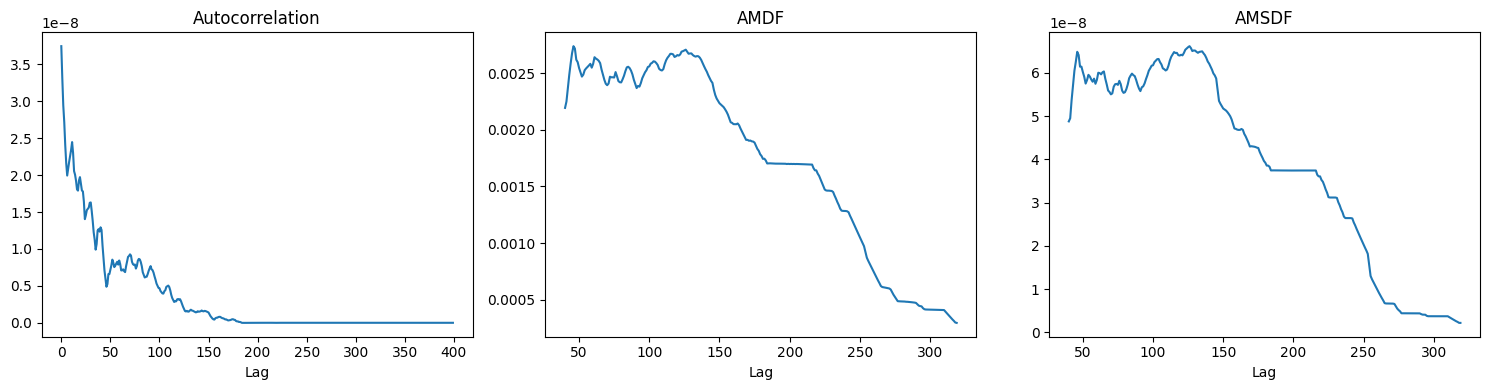

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Pitch Search Range ----
lag_min = int(fs / 400)   # 40 samples
lag_max = int(fs / 50)    # 320 samples

pitch_period_autocorr = []
pitch_period_amdf = []
pitch_period_amsdf = []

for idx in periodic_frames:

    frame = frames[:, idx] * hamming_window

    # =============================
    # 1️⃣ Autocorrelation Method
    # =============================
    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    if np.max(autocorr) != 0:
        autocorr = autocorr / np.max(autocorr)
    else:
        autocorr = np.zeros_like(autocorr)

    search_region = autocorr[lag_min:lag_max]

    if search_region.size > 0 and np.max(search_region) != 0:
        peak_lag = np.argmax(search_region) + lag_min
    else:
        peak_lag = -1

    pitch_period_autocorr.append(peak_lag)

    # =============================
    # 2️⃣ AMDF Method (FIXED)
    # =============================
    amdf_vals = []
    for lag in range(lag_min, lag_max):
        val = np.sum(np.abs(frame[:-lag] - frame[lag:]))
        amdf_vals.append(val)

    amdf_vals = np.array(amdf_vals)

    min_lag_amdf = -1
    for i in range(1, len(amdf_vals)-1):
        if amdf_vals[i] < amdf_vals[i-1] and amdf_vals[i] < amdf_vals[i+1]:
            min_lag_amdf = i + lag_min
            break

    if min_lag_amdf == -1:
        min_lag_amdf = np.argmin(amdf_vals) + lag_min

    pitch_period_amdf.append(min_lag_amdf)

    # =============================
    # 3️⃣ AMSDF Method (FIXED)
    # =============================
    amsdf_vals = []
    for lag in range(lag_min, lag_max):
        val = np.sum((frame[:-lag] - frame[lag:])**2)
        amsdf_vals.append(val)

    amsdf_vals = np.array(amsdf_vals)

    min_lag_amsdf = -1
    for i in range(1, len(amsdf_vals)-1):
        if amsdf_vals[i] < amsdf_vals[i-1] and amsdf_vals[i] < amsdf_vals[i+1]:
            min_lag_amsdf = i + lag_min
            break

    if min_lag_amsdf == -1:
        min_lag_amsdf = np.argmin(amsdf_vals) + lag_min

    pitch_period_amsdf.append(min_lag_amsdf)


pitch_period_autocorr = np.array(pitch_period_autocorr)
pitch_period_amdf = np.array(pitch_period_amdf)
pitch_period_amsdf = np.array(pitch_period_amsdf)

print("First 10 Pitch Periods (in samples)")
print("Autocorrelation:", pitch_period_autocorr[:10])
print("AMDF           :", pitch_period_amdf[:10])
print("AMSDF          :", pitch_period_amsdf[:10])


# ==========================================
# 🔷 Plot Example Frame (UNCHANGED)
# ==========================================

example_idx = periodic_frames[0]
example_frame = frames[:, example_idx] * hamming_window

# Autocorrelation
autocorr = np.correlate(example_frame, example_frame, mode='full')
autocorr = autocorr[len(autocorr)//2:]

# AMDF
amdf_vals = []
for lag in range(lag_min, lag_max):
    amdf_vals.append(np.sum(np.abs(example_frame[:-lag] - example_frame[lag:])))

# AMSDF
amsdf_vals = []
for lag in range(lag_min, lag_max):
    amsdf_vals.append(np.sum((example_frame[:-lag] - example_frame[lag:])**2))

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(autocorr)
plt.title("Autocorrelation")
plt.xlabel("Lag")

plt.subplot(1,3,2)
plt.plot(range(lag_min, lag_max), amdf_vals)
plt.title("AMDF")
plt.xlabel("Lag")

plt.subplot(1,3,3)
plt.plot(range(lag_min, lag_max), amsdf_vals)
plt.title("AMSDF")
plt.xlabel("Lag")

plt.tight_layout()
plt.show()


b) Explain how periodicity is reflected in these functions (peaks in autocorrelation, minima in AMDF/AMSDF).

Autocorrelation

For periodic (voiced) speech, the waveform repeats at regular intervals.

This repetition causes secondary peaks in the autocorrelation function.

The distance between zero lag and first major peak = pitch period.

Strong peaks indicate strong periodicity.

For unvoiced speech:

No regular repetition

Autocorrelation decays quickly

No clear secondary peaks

🔹 AMDF (Average Magnitude Difference Function)

Measures average absolute difference between signal and delayed version.

When lag equals pitch period:

Signal matches closely

Difference becomes minimum

So periodic speech shows clear minima.

Unvoiced speech:

Irregular waveform

No consistent minima

🔹 AMSDF (Average Magnitude Squared Difference Function)

Similar to AMDF but squared difference.

Produces smoother curve.

Also shows distinct minima at pitch period.

More stable than AMDF.

c) Distinguish between periodic (voiced) and aperiodic (unvoiced) frames.

In [20]:
print("\n===== Periodic vs Aperiodic Feature Comparison =====\n")

features_list = [
    ("STE", STE),
    ("ZCR", ZCR),
    ("Autocorr", Autocorr),
]

for name, feature in features_list:

    periodic_mean = np.mean(feature[periodic_frames])
    aperiodic_mean = np.mean(feature[aperiodic_frames])

    print(f"{name}")
    print(f"  Periodic Mean   : {periodic_mean:.6f}")
    print(f"  Aperiodic Mean  : {aperiodic_mean:.6f}")

    if periodic_mean > aperiodic_mean:
        print("  ➜ Higher in Periodic (Voiced)")
    else:
        print("  ➜ Higher in Aperiodic (Unvoiced)")

    print("-------------------------------------")



===== Periodic vs Aperiodic Feature Comparison =====

STE
  Periodic Mean   : 0.263231
  Aperiodic Mean  : 0.004702
  ➜ Higher in Periodic (Voiced)
-------------------------------------
ZCR
  Periodic Mean   : 0.068129
  Aperiodic Mean  : 0.144112
  ➜ Higher in Aperiodic (Unvoiced)
-------------------------------------
Autocorr
  Periodic Mean   : 0.258816
  Aperiodic Mean  : 0.004079
  ➜ Higher in Periodic (Voiced)
-------------------------------------


===== Average Pitch Frequency (Hz) =====

Autocorrelation: 239.1717322439872
AMDF           : 267.29969070619023
AMSDF          : 262.19773588360687


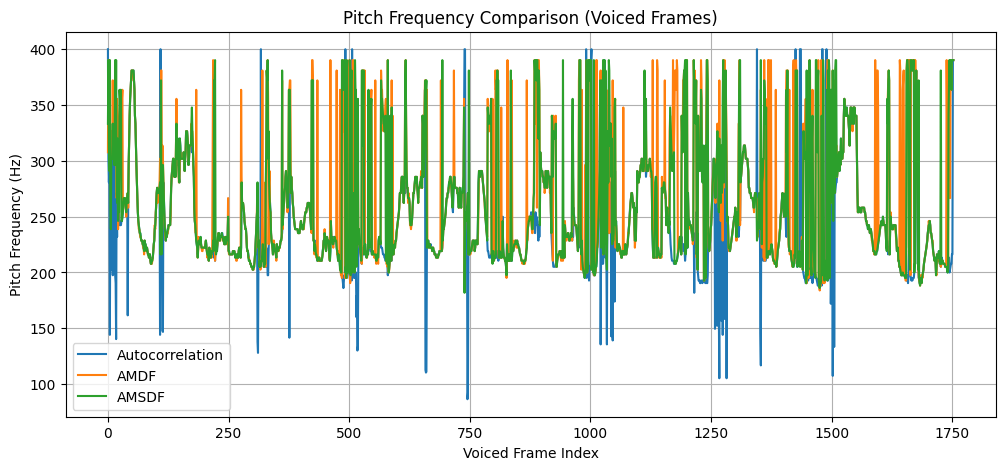

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Convert Pitch Period to Pitch Frequency ----
pitch_freq_autocorr = fs / pitch_period_autocorr
pitch_freq_amdf = fs / pitch_period_amdf
pitch_freq_amsdf = fs / pitch_period_amsdf

print("===== Average Pitch Frequency (Hz) =====\n")
print("Autocorrelation:", np.mean(pitch_freq_autocorr))
print("AMDF           :", np.mean(pitch_freq_amdf))
print("AMSDF          :", np.mean(pitch_freq_amsdf))


# ==========================================
# 🔷 Plot Comparison of All Three Methods
# ==========================================

plt.figure(figsize=(12,5))

plt.plot(pitch_freq_autocorr, label="Autocorrelation")
plt.plot(pitch_freq_amdf, label="AMDF")
plt.plot(pitch_freq_amsdf, label="AMSDF")

plt.title("Pitch Frequency Comparison (Voiced Frames)")
plt.xlabel("Voiced Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.legend()
plt.grid(True)
plt.show()


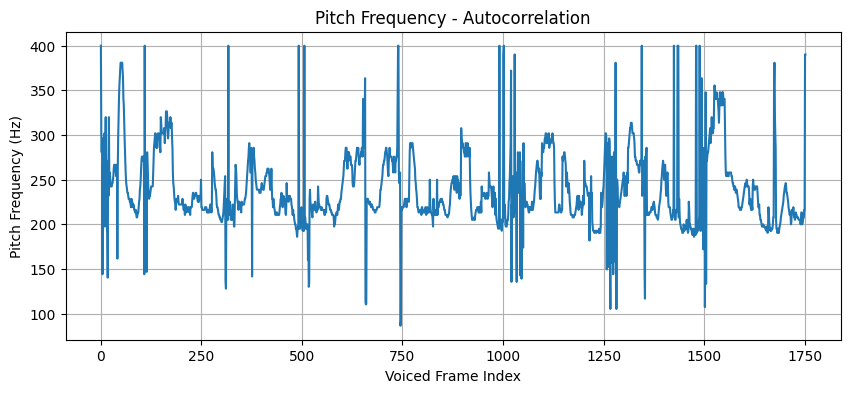

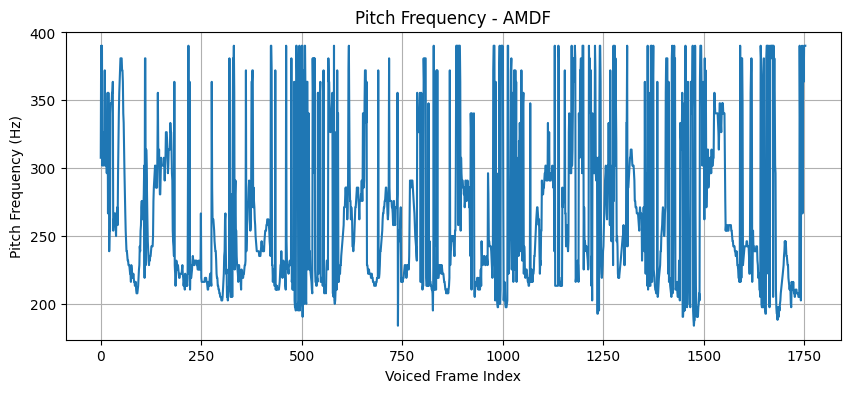

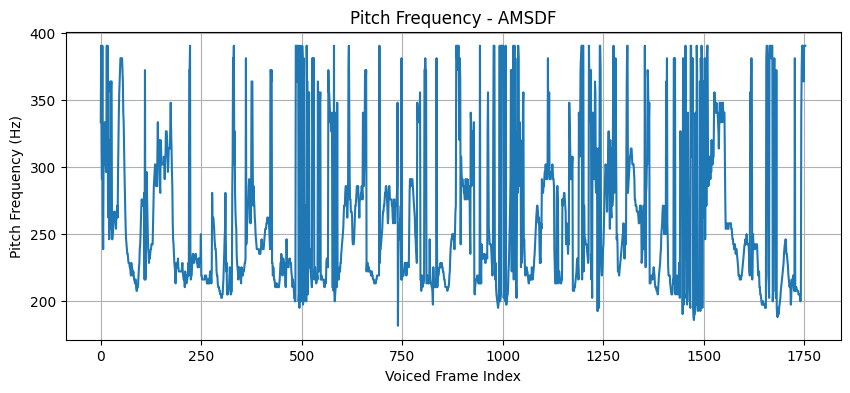

In [22]:
import matplotlib.pyplot as plt

# ---- Separate Plots ----

plt.figure(figsize=(10,4))
plt.plot(pitch_freq_autocorr)
plt.title("Pitch Frequency - Autocorrelation")
plt.xlabel("Voiced Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,4))
plt.plot(pitch_freq_amdf)
plt.title("Pitch Frequency - AMDF")
plt.xlabel("Voiced Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,4))
plt.plot(pitch_freq_amsdf)
plt.title("Pitch Frequency - AMSDF")
plt.xlabel("Voiced Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.show()


Periodic (Voiced) Frames

High energy

Low Zero Crossing Rate

Strong autocorrelation peaks

Clear AMDF / AMSDF minima

Regular waveform structure

🔹 Aperiodic (Unvoiced) Frames

Lower energy

High Zero Crossing Rate

No strong autocorrelation peaks

No clear minima in AMDF/AMSDF

Noise-like waveform

**3.
Task-3: Pitch Estimation: For frames identified as periodic,**

a) Determine the pitch period from the lag corresponding to the first prominent autocorrelation peak (excluding zero lag) or the first minimum of AMDF and AMSDF.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# Pitch Search Range (50Hz – 400Hz)
# ---------------------------------------
lag_min = int(fs / 400)
lag_max = int(fs / 50)

pitch_period_autocorr = []
pitch_period_amdf = []
pitch_period_amsdf = []

# ---------------------------------------
# Compute Pitch Period for Periodic Frames
# ---------------------------------------
for idx in periodic_frames:

    frame = frames[:, idx] * hamming_window

    # =============================
    # 1️⃣ Autocorrelation Method
    # =============================
    autocorr = np.correlate(frame, frame, mode='full')
    autocorr = autocorr[len(autocorr)//2:]

    if np.max(autocorr) != 0:
        autocorr = autocorr / np.max(autocorr)

    search_region = autocorr[lag_min:lag_max]
    peak_lag = np.argmax(search_region) + lag_min
    pitch_period_autocorr.append(peak_lag)

    # =============================
    # 2️⃣ AMDF Method
    # =============================
    amdf_vals = []
    for lag in range(lag_min, lag_max):
        amdf_vals.append(np.sum(np.abs(frame[:-lag] - frame[lag:])))
    amdf_vals = np.array(amdf_vals)

    # First local minimum
    min_lag_amdf = -1
    for i in range(1, len(amdf_vals)-1):
        if amdf_vals[i] < amdf_vals[i-1] and amdf_vals[i] < amdf_vals[i+1]:
            min_lag_amdf = i + lag_min
            break

    if min_lag_amdf == -1:
        min_lag_amdf = np.argmin(amdf_vals) + lag_min

    pitch_period_amdf.append(min_lag_amdf)

    # =============================
    # 3️⃣ AMSDF Method
    # =============================
    amsdf_vals = []
    for lag in range(lag_min, lag_max):
        amsdf_vals.append(np.sum((frame[:-lag] - frame[lag:])**2))
    amsdf_vals = np.array(amsdf_vals)

    # First local minimum
    min_lag_amsdf = -1
    for i in range(1, len(amsdf_vals)-1):
        if amsdf_vals[i] < amsdf_vals[i-1] and amsdf_vals[i] < amsdf_vals[i+1]:
            min_lag_amsdf = i + lag_min
            break

    if min_lag_amsdf == -1:
        min_lag_amsdf = np.argmin(amsdf_vals) + lag_min

    pitch_period_amsdf.append(min_lag_amsdf)

pitch_period_autocorr = np.array(pitch_period_autocorr)
pitch_period_amdf = np.array(pitch_period_amdf)
pitch_period_amsdf = np.array(pitch_period_amsdf)

print("First 10 Pitch Periods (samples)")
print("Autocorrelation:", pitch_period_autocorr[:10])
print("AMDF           :", pitch_period_amdf[:10])
print("AMSDF          :", pitch_period_amsdf[:10])

First 10 Pitch Periods (samples)
Autocorrelation: [ 40  53  57  54 111  60  67  68  79  53]
AMDF           : [52 41 43 41 53 50 49 52 53 52]
AMSDF          : [48 41 51 55 41 60 67 53 53 53]


b) Compute the pitch frequency and infer about the result.

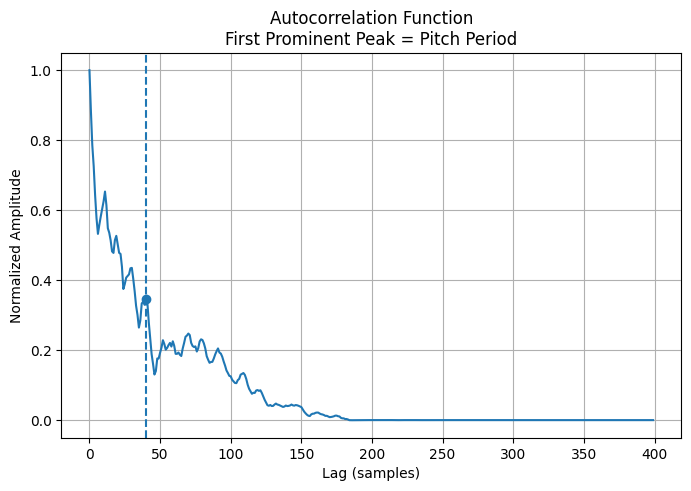

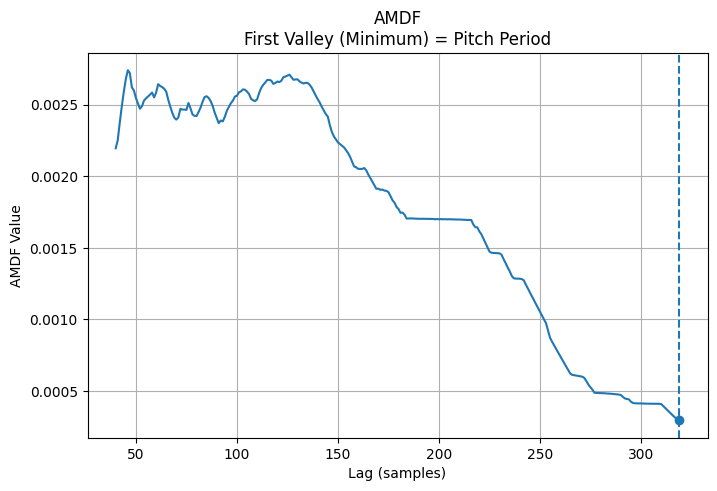

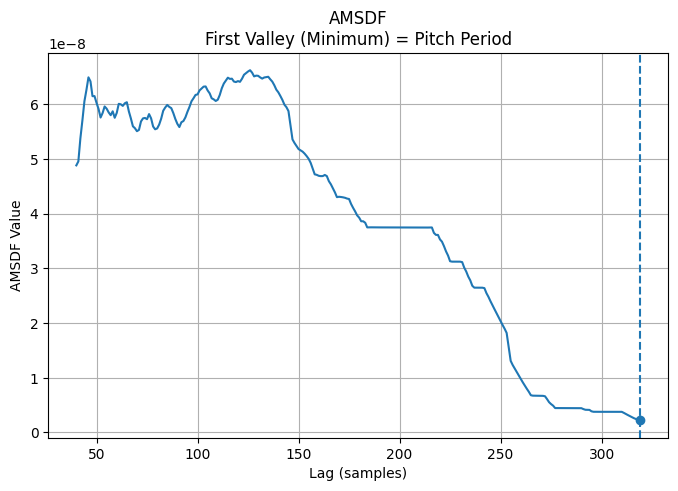

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Select one periodic frame
example_idx = periodic_frames[0]
frame = frames[:, example_idx] * hamming_window

lag_min = int(fs / 400)
lag_max = int(fs / 50)

# ==========================================
# 1️⃣ AUTOCORRELATION
# ==========================================
autocorr = np.correlate(frame, frame, mode='full')
autocorr = autocorr[len(autocorr)//2:]
autocorr = autocorr / np.max(autocorr)

search_region = autocorr[lag_min:lag_max]
peak_lag = np.argmax(search_region) + lag_min

plt.figure(figsize=(8,5))
plt.plot(autocorr)
plt.axvline(peak_lag, linestyle='--')
plt.scatter(peak_lag, autocorr[peak_lag])
plt.title("Autocorrelation Function\nFirst Prominent Peak = Pitch Period")
plt.xlabel("Lag (samples)")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()


# ==========================================
# 2️⃣ AMDF
# ==========================================
amdf_vals = []
for lag in range(lag_min, lag_max):
    amdf_vals.append(np.sum(np.abs(frame[:-lag] - frame[lag:])))
amdf_vals = np.array(amdf_vals)

min_lag_amdf = np.argmin(amdf_vals) + lag_min

plt.figure(figsize=(8,5))
plt.plot(range(lag_min, lag_max), amdf_vals)
plt.axvline(min_lag_amdf, linestyle='--')
plt.scatter(min_lag_amdf, np.min(amdf_vals))
plt.title("AMDF\nFirst Valley (Minimum) = Pitch Period")
plt.xlabel("Lag (samples)")
plt.ylabel("AMDF Value")
plt.grid(True)
plt.show()


# ==========================================
# 3️⃣ AMSDF
# ==========================================
amsdf_vals = []
for lag in range(lag_min, lag_max):
    amsdf_vals.append(np.sum((frame[:-lag] - frame[lag:])**2))
amsdf_vals = np.array(amsdf_vals)

min_lag_amsdf = np.argmin(amsdf_vals) + lag_min

plt.figure(figsize=(8,5))
plt.plot(range(lag_min, lag_max), amsdf_vals)
plt.axvline(min_lag_amsdf, linestyle='--')
plt.scatter(min_lag_amsdf, np.min(amsdf_vals))
plt.title("AMSDF\nFirst Valley (Minimum) = Pitch Period")
plt.xlabel("Lag (samples)")
plt.ylabel("AMSDF Value")
plt.grid(True)
plt.show()

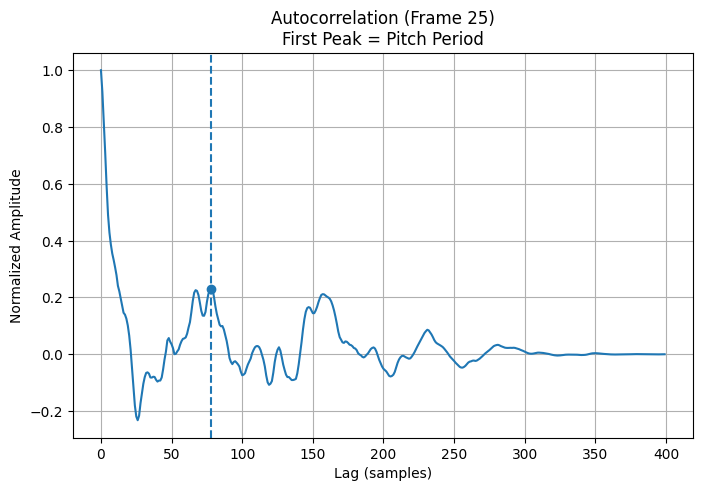

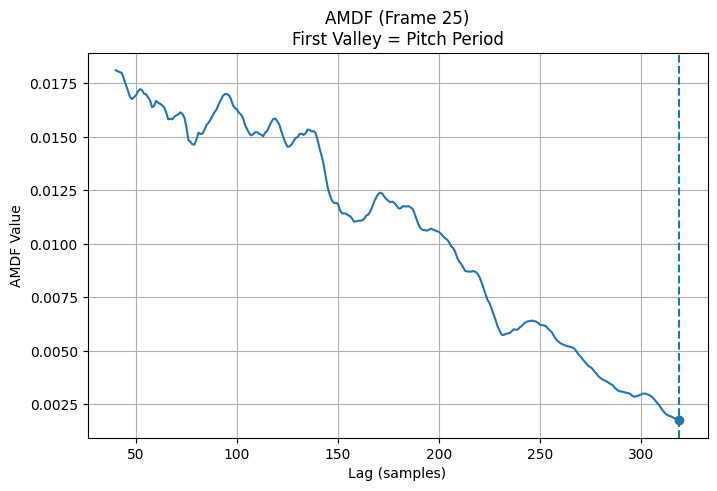

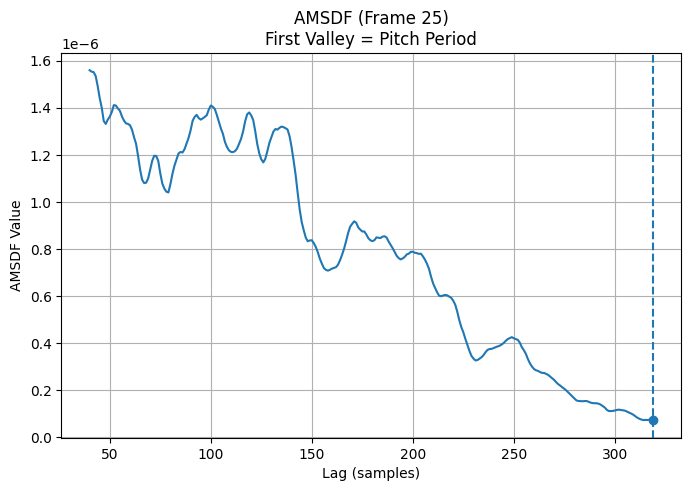

Pitch Period (samples)
Autocorr: 78
AMDF    : 319
AMSDF   : 319

Pitch Frequency (Hz)
Autocorr: 205.12820512820514
AMDF    : 50.156739811912225
AMSDF   : 50.156739811912225


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------
# 🔷 Select Specific Frame
# ---------------------------------
frame_index = 25   # <<< CHANGE THIS to any frame you want

frame = frames[:, frame_index] * hamming_window

lag_min = int(fs / 400)
lag_max = int(fs / 50)

# ==========================================
# 1️⃣ AUTOCORRELATION
# ==========================================
autocorr = np.correlate(frame, frame, mode='full')
autocorr = autocorr[len(autocorr)//2:]

if np.max(autocorr) != 0:
    autocorr = autocorr / np.max(autocorr)

search_region = autocorr[lag_min:lag_max]
peak_lag = np.argmax(search_region) + lag_min

plt.figure(figsize=(8,5))
plt.plot(autocorr)
plt.axvline(peak_lag, linestyle='--')
plt.scatter(peak_lag, autocorr[peak_lag])
plt.title(f"Autocorrelation (Frame {frame_index})\nFirst Peak = Pitch Period")
plt.xlabel("Lag (samples)")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.show()


# ==========================================
# 2️⃣ AMDF
# ==========================================
amdf_vals = []
for lag in range(lag_min, lag_max):
    amdf_vals.append(np.sum(np.abs(frame[:-lag] - frame[lag:])))
amdf_vals = np.array(amdf_vals)

min_lag_amdf = np.argmin(amdf_vals) + lag_min

plt.figure(figsize=(8,5))
plt.plot(range(lag_min, lag_max), amdf_vals)
plt.axvline(min_lag_amdf, linestyle='--')
plt.scatter(min_lag_amdf, np.min(amdf_vals))
plt.title(f"AMDF (Frame {frame_index})\nFirst Valley = Pitch Period")
plt.xlabel("Lag (samples)")
plt.ylabel("AMDF Value")
plt.grid(True)
plt.show()


# ==========================================
# 3️⃣ AMSDF
# ==========================================
amsdf_vals = []
for lag in range(lag_min, lag_max):
    amsdf_vals.append(np.sum((frame[:-lag] - frame[lag:])**2))
amsdf_vals = np.array(amsdf_vals)

min_lag_amsdf = np.argmin(amsdf_vals) + lag_min

plt.figure(figsize=(8,5))
plt.plot(range(lag_min, lag_max), amsdf_vals)
plt.axvline(min_lag_amsdf, linestyle='--')
plt.scatter(min_lag_amsdf, np.min(amsdf_vals))
plt.title(f"AMSDF (Frame {frame_index})\nFirst Valley = Pitch Period")
plt.xlabel("Lag (samples)")
plt.ylabel("AMSDF Value")
plt.grid(True)
plt.show()


# ---------------------------------
# 🔷 Print Pitch Period & Frequency
# ---------------------------------
print("Pitch Period (samples)")
print("Autocorr:", peak_lag)
print("AMDF    :", min_lag_amdf)
print("AMSDF   :", min_lag_amsdf)

print("\nPitch Frequency (Hz)")
print("Autocorr:", fs / peak_lag)
print("AMDF    :", fs / min_lag_amdf)
print("AMSDF   :", fs / min_lag_amsdf)

First 10 Pitch Frequencies (Hz)
Autocorrelation: [400.         301.88679245 280.70175439 296.2962963  144.14414414
 266.66666667 238.80597015 235.29411765 202.53164557 301.88679245]
AMDF           : [307.69230769 390.24390244 372.09302326 390.24390244 301.88679245
 320.         326.53061224 307.69230769 301.88679245 307.69230769]
AMSDF          : [333.33333333 390.24390244 313.7254902  290.90909091 390.24390244
 266.66666667 238.80597015 301.88679245 301.88679245 301.88679245]


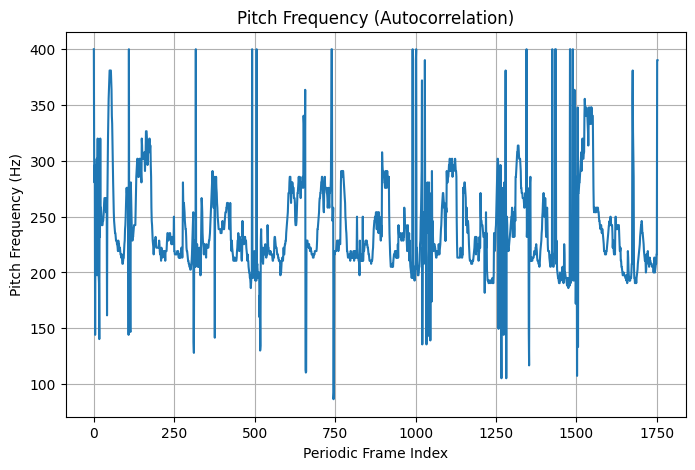

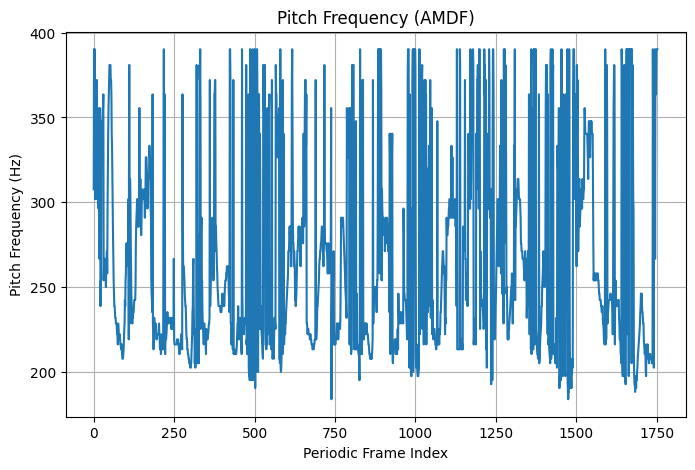

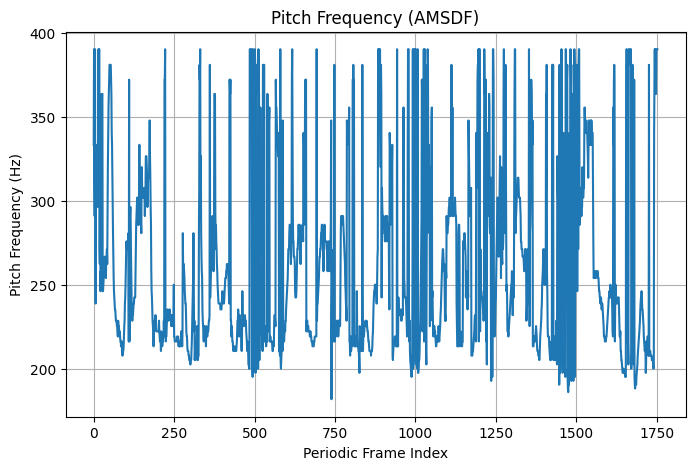

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# Convert Pitch Period → Pitch Frequency
# F0 = fs / T0
# ---------------------------------------

pitch_freq_autocorr = []
pitch_freq_amdf = []
pitch_freq_amsdf = []

for i in range(len(pitch_period_autocorr)):

    # Autocorrelation
    if pitch_period_autocorr[i] > 0:
        pitch_freq_autocorr.append(fs / pitch_period_autocorr[i])
    else:
        pitch_freq_autocorr.append(0)

    # AMDF
    if pitch_period_amdf[i] > 0:
        pitch_freq_amdf.append(fs / pitch_period_amdf[i])
    else:
        pitch_freq_amdf.append(0)

    # AMSDF
    if pitch_period_amsdf[i] > 0:
        pitch_freq_amsdf.append(fs / pitch_period_amsdf[i])
    else:
        pitch_freq_amsdf.append(0)

pitch_freq_autocorr = np.array(pitch_freq_autocorr)
pitch_freq_amdf = np.array(pitch_freq_amdf)
pitch_freq_amsdf = np.array(pitch_freq_amsdf)

# ---------------------------------------
# Print First 10 Values
# ---------------------------------------
print("First 10 Pitch Frequencies (Hz)")
print("Autocorrelation:", pitch_freq_autocorr[:10])
print("AMDF           :", pitch_freq_amdf[:10])
print("AMSDF          :", pitch_freq_amsdf[:10])


# ---------------------------------------
# Plot 1️⃣ Autocorrelation Pitch
# ---------------------------------------
plt.figure(figsize=(8,5))
plt.plot(pitch_freq_autocorr)
plt.title("Pitch Frequency (Autocorrelation)")
plt.xlabel("Periodic Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.show()


# ---------------------------------------
# Plot 2️⃣ AMDF Pitch
# ---------------------------------------
plt.figure(figsize=(8,5))
plt.plot(pitch_freq_amdf)
plt.title("Pitch Frequency (AMDF)")
plt.xlabel("Periodic Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.show()


# ---------------------------------------
# Plot 3️⃣ AMSDF Pitch
# ---------------------------------------
plt.figure(figsize=(8,5))
plt.plot(pitch_freq_amsdf)
plt.title("Pitch Frequency (AMSDF)")
plt.xlabel("Periodic Frame Index")
plt.ylabel("Pitch Frequency (Hz)")
plt.grid(True)
plt.show()

** 4. Write a discussion on: a) Compare voiced and unvoiced speech in terms of energy, ZCR, and periodicity. **

Comparison of Voiced and Unvoiced Speech

Voiced and unvoiced speech segments exhibit clear differences in terms of energy, Zero Crossing Rate (ZCR), and periodicity.

1 Energy

Voiced speech generally has higher short-time energy because it is produced by vibration of the vocal folds. The periodic glottal excitation results in strong, sustained amplitude variations.

Unvoiced speech, on the other hand, is produced by turbulent airflow without vocal fold vibration. Therefore, its energy is typically lower and more irregular compared to voiced speech.

 Observation:

Energy_Voiced > Energy_UnVoiced
	​

2 Zero Crossing Rate (ZCR)

ZCR measures how frequently the signal crosses zero amplitude.

Voiced speech has low ZCR because it is quasi-periodic and dominated by low-frequency components.

Unvoiced speech has high ZCR because it contains noise-like, high-frequency components (e.g., /s/, /f/).

 Observation:

 ZCR_UnVoiced > ZCR_Voiced


Thus, ZCR is an effective feature for distinguishing voiced from unvoiced segments.

3 Periodicity

Voiced speech is periodic due to regular vocal fold vibrations. This periodicity is visible as:

Repeated waveform patterns

Clear peaks in autocorrelation

Distinct valleys in AMDF/AMSDF

Unvoiced speech is aperiodic, noise-like, and does not show consistent repetition. Therefore:

Autocorrelation does not show strong secondary peaks

AMDF/AMSDF do not show clear periodic minima

Conclusion:
Periodicity is a strong indicator of voiced speech.

**b) Discuss how periodicity-based features help in pitch detection.**

Pitch corresponds to the fundamental frequency (F₀) of voiced speech, which arises from periodic glottal vibration.

Periodicity-based features help detect this repetition:

1 Autocorrelation

Measures similarity between a signal and its delayed version.

The first prominent peak (excluding zero lag) corresponds to the pitch period.

Strong peak → strong periodicity → reliable pitch detection.

2 AMDF (Average Magnitude Difference Function)

Measures average absolute difference between delayed signals.

The first minimum corresponds to maximum similarity → pitch period.

3 AMSDF

Similar to AMDF but uses squared differences.

Also identifies pitch from the first valley.

Thus, these functions convert periodicity into measurable peaks or minima, enabling estimation of pitch period:

F0 = T0/fs
where
fs= sampling frequency
T0= pitch period

Hence, periodicity-based features form the foundation of time-domain pitch detection.

**c) Comment on the reliability of each time-domain feature for pitch detection.**

Different time-domain features have varying reliability for pitch detection.

1 Short-Time Energy

Good for detecting speech activity.

Cannot determine pitch.

Not reliable for pitch estimation.

2 Zero Crossing Rate (ZCR)

Useful for voiced/unvoiced classification.

Does not provide pitch period.

Not reliable for pitch estimation.

3 Autocorrelation

Highly reliable for pitch detection.

Works well for clean voiced speech.

Sensitive to strong harmonics but generally stable.

4 AMDF

Computationally simple.

Slightly more sensitive to noise.

Reliable when periodicity is strong.

5 AMSDF

More sensitive to amplitude changes.

May exaggerate noise effects.

Moderately reliable.

Final Conclusion

Among all time-domain features:

Energy and ZCR are effective for voiced/unvoiced classification.

Autocorrelation is the most reliable feature for pitch detection.

AMDF and AMSDF also detect pitch but may show minor variations.

Thus, periodicity-based methods are essential for accurate pitch estimation, while other time-domain features primarily support speech segmentation and classification.